
Bad key "text.kerning_factor" on line 4 in
/Users/reza/anaconda3/envs/mosh/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


[0.122, -0.476, -0.634, -0.517, -0.127, 0.319, 0.607, 0.631, 0.608, 0.19, -0.386, -1.151, -1.558, -1.359, -1.397, -1.642, -1.904, -2.192, -1.781, -1.329, -1.03, -0.397, 0.199, 0.698, 0.713, 0.0, -0.893, -1.76, -2.176, -2.068, -2.423, -3.689, -5.042, -5.955, -6.309, -6.661, -7.145, -7.582, -7.919, -8.369, -8.969, -9.5, -10.045, -10.45, -10.893, -11.056, -11.276, -11.625, -11.63, -11.746, -12.011, -12.54, -12.832, -12.815, -12.515, -12.156, -11.921, -11.891, -11.667, -11.651, -12.164, -12.584, -12.783, -12.523, -12.325, -12.184, -12.389, -12.292, -11.661, -11.09, -10.805, -11.159, -11.501, -12.035, -12.806]
[13.1217, 13.655, 13.9517, 13.8492, 13.6767, 13.0925, 11.7217, 9.78083, 8.22417, 7.29, 6.23167, 4.77, 3.39167, 2.235, 1.48833, 1.22917, 1.26667, 0.660833, 0.510833, 1.06583, 1.46333, 1.24667, 0.969167, 0.585, 0.243333, 0.0, 0.00166667, 0.831667, 2.43417, 4.4475, 5.62583, 5.33083, 4.36167, 3.40167, 3.02833, 3.51167, 3.42417, 2.81833, 2.3925, 1.90333, 1.53, 0.994167, 0.203333, -0.5625, 

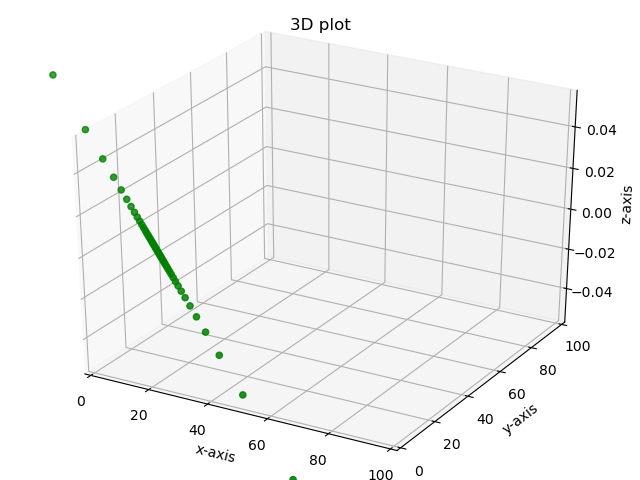

In [1]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.mosh import *
from src.mosh import rot as R
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import csv

file = open('./data.csv')

type(file)

csvreader = csv.reader(file)

header = []
header = next(csvreader)
header

rows = []
roll = []
pitch = []
yaw = []
flag = 0
for row in csvreader:
    if flag == 0:
        pass
    else:
        rows.append(row)
        roll.append(float(rows[-1][3]))
        pitch.append(float(rows[-1][2]))
        yaw.append(float(rows[-1][1]))
    flag+=1

print(roll)
print(pitch)
print(yaw)

def plot_angles(roll, pitch, yaw):
    t_lis = np.linspace(-0.5, 1., len(roll))
    fig_ang = plt.figure()
    axes = fig_ang.add_subplot(1,1,1)
    axes.plot(t_lis, roll, label='R', color = 'orange')
    axes.plot(t_lis, pitch, label='P', color = 'blue')
    axes.plot(t_lis, yaw, label='Y', color = 'red')
    axes.legend(loc=9)
    plt.xlabel('t [sec]')
    plt.ylabel('Angle [degree]')
    plt.savefig('./plots/angles.pdf')
    return 0

plot_angles(roll, pitch, yaw)

m = Symbol('m')

p_0 = [0., 0., 0.]
d = [1., 1., 0.]
r_e_H = r_e_h(p_0, d, m)

phi = 0. #Roll
theta = 0. #Pitch
# psi = 0. #Yaw
degree = False
xs = []
ys = []
zs = []
x0, y0 = 20.*np.sqrt(2), 20.*np.sqrt(2)
for psi in np.linspace(-0.5*np.pi, 0.5*np.pi, 50):
    
    r = R(phi, theta, psi, degree)
    r_e_I = np.matmul(r, r_e_H)
    mul = solve_m(x0, y0, r_e_I, m)
#     print(mul)
    r_e = lambdify(m, r_e_I)
    r_ = np.array(r_e(mul[m]))
    xs.append(r_[0][0])
    ys.append(r_[1][0])
    zs.append(r_[2][0])
#     xs.append(0.)
#     print(r_)
    

#------------------------------------------

# creating 3d plot using matplotlib 
# in python
  
# for creating a responsive plot
%matplotlib widget
  
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
  
# creating figure
fig = plt.figure()
ax = Axes3D(fig)

# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

# creating the plot
plot_geeks = ax.scatter(xs, ys, zs, color='green')

plt.xlim([0., 100.])
plt.ylim([0., 100.])
# displaying the plot
plt.show()


/var/folders/93/sp1x4ytn2mj_zkqd4_1gfdqr0000gn/T/ipykernel_35453/2576842276.py:92: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


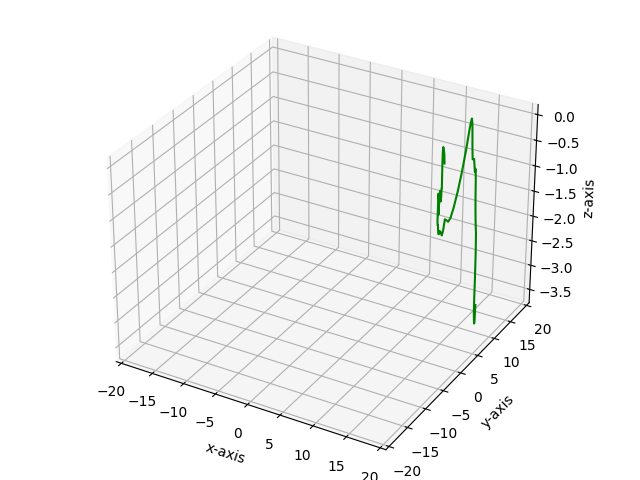

In [15]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.mosh import *
from src.mosh import rot as R
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import csv

file = open('./data2.csv')

type(file)

csvreader = csv.reader(file)

header = []
header = next(csvreader)
header

rows = []
roll = []
pitch = []
yaw = []
flag = 0
for row in csvreader:
    if flag == 0:
        pass
    else:
        rows.append(row)
        roll.append(float(rows[-1][3]))
        pitch.append(float(rows[-1][2]))
        yaw.append(float(rows[-1][1]))

    flag+=1

# print(roll)
# print(pitch)
# print(yaw)

m = Symbol('m')

p_0 = [0., 0., 0.]
d = [1., 1., 0.]
r_e_H = r_e_h(p_0, d, m)

# phi = 0. #Roll
# theta = 0. #Pitch
# psi = 0. #Yaw
degree = True
xs = []
ys = []
zs = []
x0, y0 = 20.*np.sqrt(2), 20.*np.sqrt(2)

for i in range(len(roll)):
    phi = roll[i]
    theta = pitch[i]
    psi = yaw[i]
    r = R(phi, theta, psi, degree)
    r_e_I = np.matmul(r, r_e_H)
    mul = solve_m(x0, y0, r_e_I, m)
#     print(mul)
    r_e = lambdify(m, r_e_I)
    r_ = np.array(r_e(mul[m]))
    xs.append(r_[0][0])
    ys.append(r_[1][0])
    zs.append(r_[2][0])
#     xs.append(0.)
#     print(r_)
    
# print(xs,'\n')
# print(ys,'\n')
# print(zs)
#------------------------------------------

# creating 3d plot using matplotlib 
# in python
  
# for creating a responsive plot
%matplotlib widget
  
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
  
# creating figure
fig = plt.figure()
ax = Axes3D(fig)

# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

# creating the plot
plot_geeks = ax.plot(xs, ys, zs, color='green')

plt.xlim([-20., 20.])
plt.ylim([-20., 20.])

# displaying the plot
plt.show()



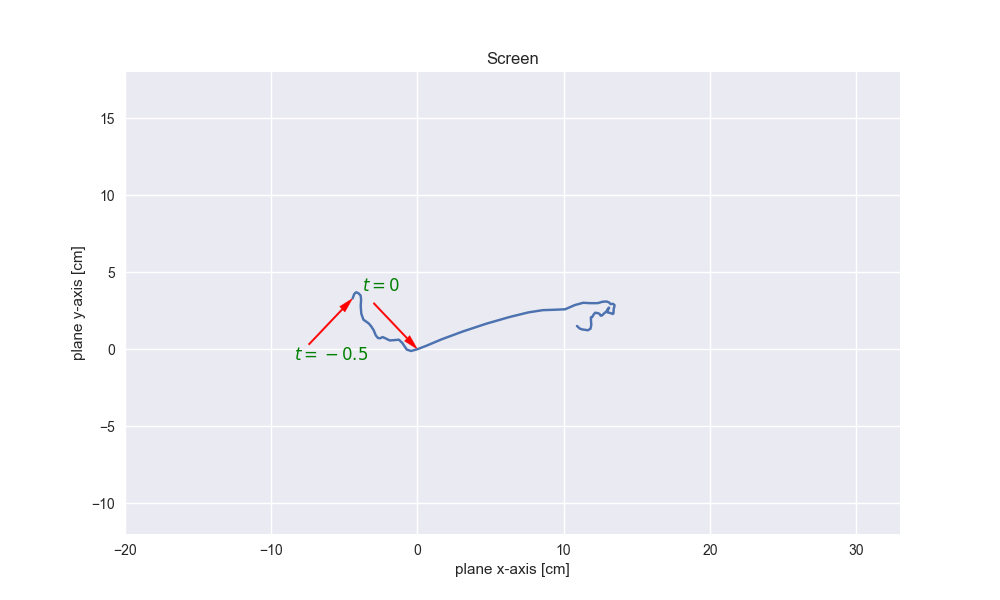

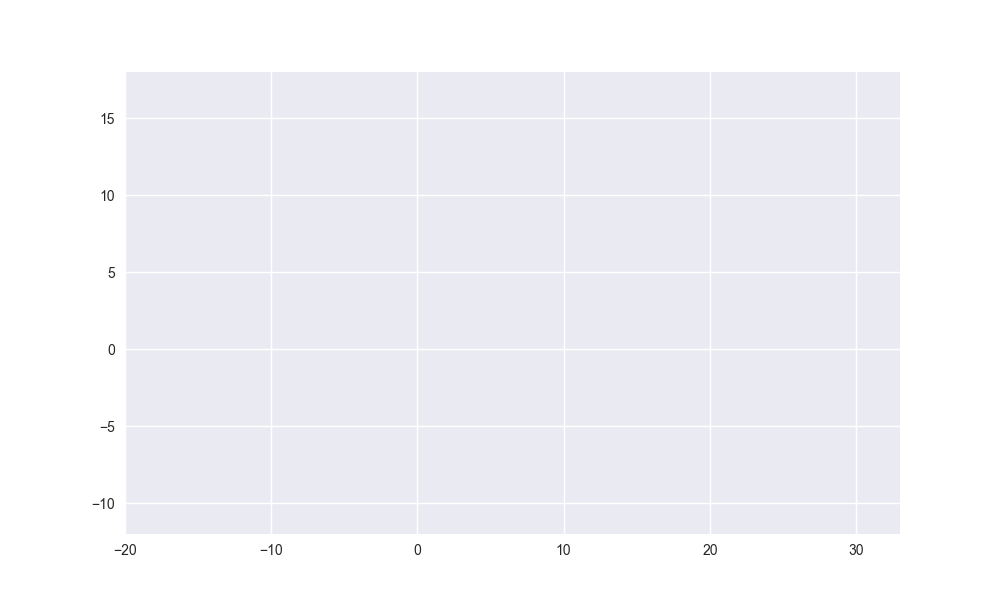

In [17]:
import random
import matplotlib
from matplotlib import animation
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
from matplotlib.animation import FuncAnimation
from itertools import count
%matplotlib widget

# Rotating the plane
rot_ang = np.arcsin(y0/np.sqrt(x0**2 + y0**2))
# print(np.sin(rot_ang)**2)

rot_ax = np.array([0., 0., 1.])
# print(np.cross(rot_ax, v_in))

x_p = []
y_p = []

for i in range(len(xs)):
    
    v_in = np.array([xs[i], ys[i], zs[i]])
    # print(v_in)

    v_fin = v_in*np.cos(rot_ang) + np.cross(rot_ax, v_in)*np.sin(rot_ang) + rot_ax*(np.dot(rot_ax, v_in))*(1 - np.cos(rot_ang))
    
    x_p.append(-v_fin[0]) #minus sign if looking from mouse perspective. 
    y_p.append(-v_fin[2]) #minus sign if looking from mouse perspective.

ind = np.where(np.array(roll)==0.0)[0][0]
fig1 = plt.figure(figsize=(10,6))
axes = fig1.add_subplot(1,1,1)
# circ = plt.Circle((x_p[30], y_p[30]), radius=2., color='r', fill=False, visible=True, lw=0.85)
# axes.add_artist(circ)
plt.plot(x_p, y_p)
dx, dy = -3., -3.
plt.arrow(x_p[ind]+dx, y_p[ind]-dy, -dx, dy, width=0.1, color='r', length_includes_head=True, head_width=0.5, head_length=1.)
plt.text(x_p[ind]+dx-0.8, y_p[ind]-dy+0.8, r'$t = 0.$', color='green', size='large')
plt.arrow(x_p[0]+dx, y_p[0]+dy, -dx, -dy, width=0.1, color='r', length_includes_head=True, head_width=0.5, head_length=1.)
plt.text(x_p[0]+dx-1., y_p[0]+dy-1., r'$t = - 0.5$', color='green', size='large')
plt.xlabel('plane x-axis [cm]')
plt.ylabel('plane y-axis [cm]')
plt.ylim(-12., 18.)
plt.xlim(-20., 33)
plt.title('Screen')
plt.savefig('./plots/cell1.pdf', format='pdf')
# displaying the plot
plt.show()


fig = plt.figure(figsize=(10,6))
axes = fig.add_subplot(1,1,1)
axes.set_ylim(-12., 18.)
axes.set_xlim(-20., 33)
plt.style.use("seaborn")
x,y=[],[]

def animate(i):
    if i<len(x_p):
        x.append(x_p[i]) 
        y.append(y_p[i])
        dx, dy = -3., -3.
        plt.arrow(x_p[ind]+dx, y_p[ind]-dy, -dx, dy, width=0.1, color='r', length_includes_head=True, head_width=0.5, head_length=1.)
        plt.text(x_p[ind]+dx-0.8, y_p[ind]-dy+0.8, r'$t = 0.$', color='green', size='large')
        plt.arrow(x_p[0]+dx, y_p[0]+dy, -dx, -dy, width=0.1, color='r', length_includes_head=True, head_width=0.5, head_length=1.)
        plt.text(x_p[0]+dx-1., y_p[0]+dy-1., r'$t = - 0.5$', color='green', size='large')
        plt.xlabel('plane x-axis [cm]')
        plt.ylabel('plane y-axis [cm]')
        plt.title('Screen')
        plt.plot(x,y, scaley=True, scalex=True, color="blue")

# ani = FuncAnimation(fig=fig, func=animate, interval=20)
# f = r"./plots/animation1.gif" 
# writergif = animation.PillowWriter(fps=15) 
# ani.save(f, writer=writergif)




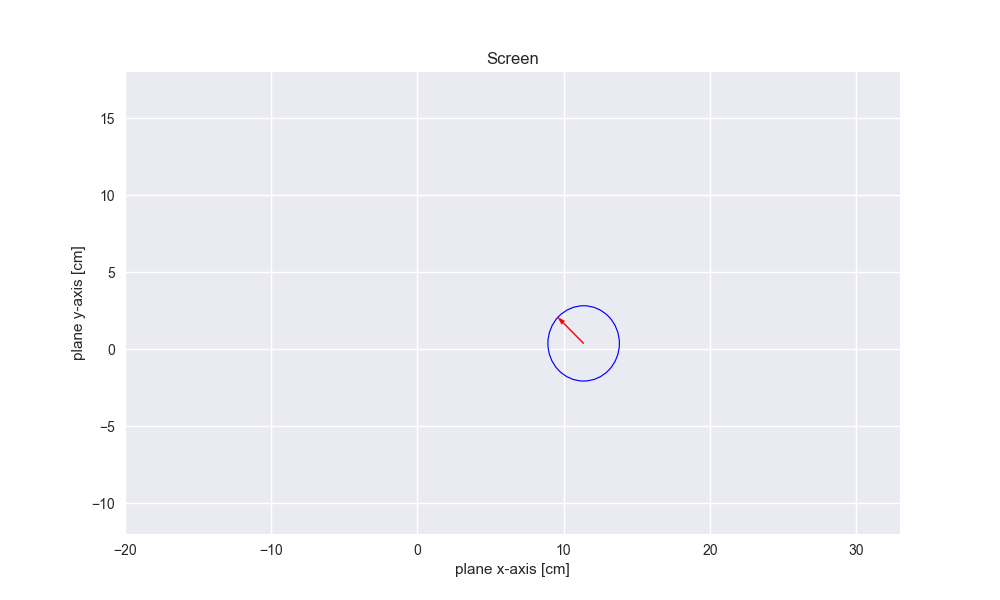

In [3]:
fig2 = plt.figure(figsize=(10,6))
axes = fig2.add_subplot(1,1,1)



x, y, u, v = [], [], [], []
def animate(i):
    if i<len(x_p)-1:
    #     x.append(x_p[i])
    #     y.append(y_p[i])
    #     u.append(x_p[i+1]-x_p[i])
    #     v.append(y_p[i+1]-y_p[i])
        x = x_p[i]
        y = y_p[i]
        u = 10*float(x_p[i+1]-x_p[i])
        v = 10*float(y_p[i+1]-y_p[i])
        axes.clear()
        axes.set_ylim(-12., 18.)
        axes.set_xlim(-20., 33)
        plt.style.use("seaborn")
        plt.xlabel('plane x-axis [cm]')
        plt.ylabel('plane y-axis [cm]')
        plt.title('Screen')
        plt.arrow(x, y, u, v, width=0.07, color='r', length_includes_head=True, head_width=0.3, head_length=0.5)
        circ = plt.Circle((x, y), radius=np.hypot(u,v), color='b', fill=False, visible=True, lw=0.85)
        axes.add_artist(circ)
#         plt.plot(x,y, scaley=True, scalex=True, color="blue")
#         plt.quiver([x, y], u, v)

ani = FuncAnimation(fig=fig2, func=animate, interval=20)
f = r"./plots/animation_vector_field.gif" 
writergif = animation.PillowWriter(fps=15) 
ani.save(f, writer=writergif)

# fig = plt.figure(figsize=(10,6))
# axes = fig.add_subplot(1,1,1)
# axes.set_ylim(-12., 18.)
# axes.set_xlim(-20., 33)
# plt.style.use("seaborn")
# x,y=[],[]

# def animate(i):
#     if i<len(x_p):
#         x.append(x_p[i]) 
#         y.append(y_p[i])
#         dx, dy = -3., -3.
#         plt.arrow(x+dx, y-dy, -dx, dy, width=0.1, color='r', length_includes_head=True, head_width=0.5, head_length=1.)
#         plt.text(x_p[ind]+dx-0.8, y_p[ind]-dy+0.8, r'$t = 0.$', color='green', size='large')
#         plt.arrow(x_p[0]+dx, y_p[0]+dy, -dx, -dy, width=0.1, color='r', length_includes_head=True, head_width=0.5, head_length=1.)
#         plt.text(x_p[0]+dx-1., y_p[0]+dy-1., r'$t = - 0.5$', color='green', size='large')
#         plt.xlabel('plane x-axis [cm]')
#         plt.ylabel('plane y-axis [cm]')
#         plt.title('Screen')
#         plt.plot(x,y, scaley=True, scalex=True, color="blue")

# ani = FuncAnimation(fig=fig, func=animate, interval=20)
# f = r"./plots/animation_vector_field.gif" 
# writergif = animation.PillowWriter(fps=15) 
# ani.save(f, writer=writergif)


### Polar and velocity plots

In [2]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.mosh import *
from src.mosh import rot as R
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import csv

def plane_data_no_corr(name, L):

    L_data1 = np.loadtxt('./dat/'+name+'/'+name+'_1.txt')
    L_data2 = np.loadtxt('./dat/'+name+'/'+name+'_4.txt')

    D_data1 = np.loadtxt('./dat/'+name+'/'+name+'_2.txt')
    D_data2 = np.loadtxt('./dat/'+name+'/'+name+'_3.txt')

    L_data = (L_data1 + L_data2)/2.
    D_data = (D_data1 + D_data2)/2.
    
    if L==True:
        data = L_data
    else:
        data = D_data

    roll = []
    pitch = []
    yaw = []

    for i in range(len(data[0])):

        yaw.append(float(data[0][i]))
        pitch.append(float(data[1][i]))
        roll.append(float(data[2][i])) 

    # print(roll)
    # print(pitch)
    # print(yaw)

    m = Symbol('m')

    p_0 = [1., 1., 1.]
    d = [1., 1., 0.]
    r_e_H = r_e_h(p_0, d, m)

    degree = True
    xs = []
    ys = []
    zs = []
    x0, y0 = 20.*np.sqrt(2), 20.*np.sqrt(2)

    for i in range(len(roll)):
        phi = roll[i]
        theta = pitch[i]
        psi = yaw[i]
        r = R(phi, theta, psi, degree)
        r_e_I = np.matmul(r, r_e_H)
        mul = solve_m(x0, y0, r_e_I, m)
    #     print(mul)
        r_e = lambdify(m, r_e_I)
        r_ = np.array(r_e(mul[m]))
        xs.append(r_[0][0])
        ys.append(r_[1][0])
        zs.append(r_[2][0])
    #     xs.append(0.)
    #     print(r_)

    # print(xs,'\n')
    # print(ys,'\n')
    # print(zs)

    # Rotating the plane
    rot_ang = np.arcsin(y0/np.sqrt(x0**2 + y0**2))
    # print(np.sin(rot_ang)**2)

    rot_ax = np.array([0., 0., 1.])
    # print(np.cross(rot_ax, v_in))

    x_p = []
    y_p = []

    for i in range(len(xs)):

        v_in = np.array([xs[i], ys[i], zs[i]])
        # print(v_in)

        v_fin = v_in*np.cos(rot_ang) + np.cross(rot_ax, v_in)*np.sin(rot_ang) + rot_ax*(np.dot(rot_ax, v_in))*(1 - np.cos(rot_ang))

        x_p.append(-v_fin[0]) #minus sign if looking from mouse perspective. 
        y_p.append(-v_fin[2]) #minus sign if looking from mouse perspective.

    return x_p, y_p


def make_polar_plot(x_p, y_p, name, L, init_t, fin_t):
    
    if L==True:
        light = 'light'
    else:
        light = 'dark'
    
    r = []
    thet = []
    u_list = []
    v_list = []
    for i in range(len(x_p)-1):
        u = float(x_p[i+1]-x_p[i])
        v = float(y_p[i+1]-y_p[i])
        u_list.append(u)
        v_list.append(v)
        r.append(np.sqrt(u**2 + v**2))
        thet.append(np.arctan2(v, u))

    avg_vel_mod = [0., np.max(r)] #8*np.sqrt(np.mean(u_list)**2 + np.mean(v_list)**2)]
    avg_vel_ang = [0., np.arctan2(np.mean(v_list[init_t:fin_t]), np.mean(u_list[init_t:fin_t]))]

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.scatter(thet[0:24], r[0:24], label='$-0.5 < t < 0.$')
    ax.scatter(thet[25:49], r[25:49], label='$0. < t < 0.5$')
    ax.scatter(thet[50:], r[50:], label='$0.5 < t < 1.$')
    ax.plot(avg_vel_ang, avg_vel_mod, color='r', linewidth=2, linestyle='dashed', label='Average angle in '+light+': '+str(round(avg_vel_ang[1]*180/np.pi, 2))+' degrees')
    ax.legend(loc=9)
    ax.grid(True)
    ax.set_title("Distribution of projected eye movement velocity on the screen - "+name, va='bottom')
    plt.savefig('./plots/polar/'+name+'_'+light+'.svg', format='svg')
    plt.close()
    return round(avg_vel_ang[1]*180/np.pi, 3)



cell_list = !ls ./dat
# print(cell_list)
angles = []

init_t = 24
fin_t = 74
for i in range(len(cell_list)):
    
    name = cell_list[i]
    
    L = True
    x_p, y_p = plane_data(name, L)
    angles.append([name, 'light', make_polar_plot(x_p, y_p, name, L, init_t, fin_t)])
    
    L = False
    x_p, y_p = plane_data(name, L)
    angles.append([name, 'dark', make_polar_plot(x_p, y_p, name, L, init_t, fin_t)])
    
print(angles)


[['NewM1_3_11', 'light', 5.856], ['NewM1_3_11', 'dark', 24.44], ['NewM1_4_11', 'light', -61.847], ['NewM1_4_11', 'dark', 7.688], ['NewM1_4_21', 'light', -141.732], ['NewM1_4_21', 'dark', -156.24], ['NewM1_8_41', 'light', 40.244], ['NewM1_8_41', 'dark', 135.396], ['NewM4_4_31', 'light', -6.187], ['NewM4_4_31', 'dark', 40.575], ['NewM4_9_21', 'light', -14.231], ['NewM4_9_21', 'dark', -15.383], ['NewM5_11_11', 'light', -38.762], ['NewM5_11_11', 'dark', -15.727], ['NewM5_1_32', 'light', 137.279], ['NewM5_1_32', 'dark', 23.626], ['NewM5_1_41', 'light', 139.794], ['NewM5_1_41', 'dark', 61.576], ['NewM5_6_11', 'light', -37.689], ['NewM5_6_11', 'dark', -28.452], ['NewM5_6_32', 'light', 20.918], ['NewM5_6_32', 'dark', -2.249], ['NewM5_8_22', 'light', -159.059], ['NewM5_8_22', 'dark', 27.084], ['Vgat1_2_41', 'light', 8.786], ['Vgat1_2_41', 'dark', 17.656], ['Vgat1_3_24', 'light', 154.17], ['Vgat1_3_24', 'dark', -175.292], ['Vglut2_4_31', 'light', 17.989], ['Vglut2_4_31', 'dark', 15.064], ['Vglut

## Eye movement correction

In [100]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.mosh import *
from src.mosh import rot as R
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import csv
import random
import matplotlib
from matplotlib import animation
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
from matplotlib.animation import FuncAnimation
from itertools import count
from matplotlib import cm
from scipy.interpolate import interp1d, interp2d, griddata
from mpl_toolkits.mplot3d import Axes3D
import os.path as op
%matplotlib widget


def interp_eye_mov(h_p_data, v_p_data, pitch, labl):
#     print(h_p_data[0])
    f = interp1d(h_p_data[0], h_p_data[1]) # Horizontal data
    f2 = interp1d(v_p_data[0], v_p_data[1]) # Vertical data
    xnew = np.linspace(np.min(h_p_data[0]), np.max(h_p_data[0]), num=45, endpoint=True)
    xnew2 = np.linspace(np.min(v_p_data[0]), np.max(v_p_data[0]), num=45, endpoint=True)
    plt.plot(h_p_data[0], h_p_data[1], 'o', v_p_data[0], v_p_data[1], 'o', xnew, f(xnew), '-', xnew2, f2(xnew2), '--')
    plt.legend(['horiz. data', 'vert. data', 'horiz. fit', 'vert. fit'], loc='best')
    plt.title(labl + " correction")
    plt.xlabel(labl + "[degrees]")
    plt.ylabel("Right eye movement[degrees]")
    plt.savefig("./plots/eye_corr_" + labl + ".svg")
    plt.close()
    
    if pitch >= np.min(h_p_data[:][0]) and pitch <= np.max(h_p_data[:][0]):
        h_p_out = f(pitch)
    else:
        print(labl + " is out of range, so zero horizontal correction!")
        h_p_out = 0.
        
    if pitch >= np.min(v_p_data[:][0]) and pitch <= np.max(v_p_data[:][0]):
        v_p_out = f2(pitch)
    else:
        print(labl + " is out of range, so zero vertical correction!")
        v_p_out = 0.
    
    return h_p_out, v_p_out


def interp_eye_mov_yaw(h_p_data, pitch, labl):
#     print(h_p_data[0])
    f = interp1d(h_p_data[0], h_p_data[1]) # Horizontal data
    xnew = np.linspace(np.min(h_p_data[0]), np.max(h_p_data[0]), num=130, endpoint=True)
    plt.plot(h_p_data[0], h_p_data[1], 'o', xnew, f(xnew), '-')
    plt.legend(['horiz. data', 'horiz. fit'], loc='best')
    plt.title(labl + " correction")
    plt.xlabel(labl + "[degrees]")
    plt.ylabel("Right eye movement[degrees]")
    plt.savefig("./plots/eye_corr_" + labl + ".svg")
    plt.close()
    
    if pitch >= np.min(h_p_data[:][0]) and pitch <= np.max(h_p_data[:][0]):
        h_p_out = f(pitch)
    else:
        print(labl + " is out of range, so zero horizontal correction!")
        h_p_out = 0.
    
    return h_p_out



def eye_mov_corr(d, pitch, roll, yaw):
    
    print("pitch and roll and yaw: ", (pitch, roll, yaw))
    
    h_p = np.array(np.loadtxt("eye_mov_data/Pitch_h.txt")).T
    v_p = np.array(np.loadtxt("eye_mov_data/Pitch_v.txt")).T

    h_r = np.array(np.loadtxt("eye_mov_data/Roll_h.txt")).T
    v_r = np.array(np.loadtxt("eye_mov_data/Roll_v.txt")).T
    
    h_y = np.array(np.loadtxt("eye_mov_data/Yaw_h.txt")).T

    pitch_h, pitch_v = interp_eye_mov(h_p, v_p, pitch, labl='Pitch')
    roll_h, roll_v = interp_eye_mov(h_r, v_r, roll, labl='Roll')
    yaw_h, yaw_v = interp_eye_mov_yaw(h_y, yaw, labl='Yaw'), 0.  #--> To be completed!
    
    eye_h, eye_v = pitch_h + roll_h + 0., pitch_v + roll_v + 0.
    
    # an initial eye axis vector
    # eye_axis = np.array([0, 1, 0])
    eye_axis = d 
    
    eye_model='sakatani+isa'

    azimuth, elevation = 0., 0. #get_eye_axis_azimuth_elevation(eye_model)

    R_eye_in_head = {}
    for eye in ['right']: # Add 'left' if you want left eye calculations as well. 
        # +- 1 for left/right eye axes
        s = 1 if eye == 'left' else -1
        R_eye_in_head[eye] = np.dot(Rz(s * azimuth), Rx(elevation))
    
    R_eye_in_orbit = np.dot(Rz(-eye_h), Rx(eye_v))
    R_eye_orbit_plus_eyeInhead = np.dot(R_eye_in_head[eye], R_eye_in_orbit)
    eye_axis_vec_inHead = np.dot(R_eye_orbit_plus_eyeInhead, eye_axis)

    print("Eye axis: ", eye_axis_vec_inHead)

    return eye_axis_vec_inHead


def get_eye_axis_azimuth_elevation(eye_model='sakatani+isa'):
    """eye axis azimuth/elevation (Sakatani & Isa (2007) or Oommen & Stahl (2008))"""

    assert eye_model in ['oommen+stahl', 'sakatani+isa']

    if eye_model == 'oommen+stahl':
        azimuth = 64.
        elevation = 22.
    else:
        azimuth = 60.
        elevation = 30.

    return azimuth, elevation

def rotation_matrix(theta, axis='x'):
    """3D rotation matrix around on of the Cartesian axes (x/y/z)"""

    assert axis in ['x', 'y', 'z']

    rad = np.deg2rad(theta)
    c, s = np.cos(rad), np.sin(rad)

    if axis == 'x':
        R = np.array([[1, 0, 0],
                      [0, c, -s],
                      [0, s, c]])
    elif axis == 'y':
        R = np.array([[c, 0, s],
                      [0, 1, 0],
                      [-s, 0, c]])
    elif axis == 'z':
        R = np.array([[c, -s, 0],
                      [s, c, 0],
                      [0, 0, 1]])

    return R


def Rx(theta):
    return rotation_matrix(theta, 'x')


def Ry(theta):
    return rotation_matrix(theta, 'y')


def Rz(theta):
    return rotation_matrix(theta, 'z')

def load_data():
    # get head tilt and eye position data as Python dictionary

    data_file = './eye_mov_data/meyer_etal/data/example_freely_moving.npy'
    arr = np.load(data_file)

    # wrap into a dict
    data = {'timestamps': arr[:, 0],
            'pitch': arr[:, 1],
            'roll': arr[:, 2],
            'angular_head_velocity': {'pitch': arr[:, 3],
                                      'roll': arr[:, 4],
                                      'yaw': arr[:, 5]},
            'pupil': {'left': arr[:, [6, 7]],  # [horiz, vert]
                      'right': arr[:, [8, 9]]}}  # [horiz, vert]
    return data


data = load_data()
# print(data['angular_head_velocity']['yaw'])
print('dt = ', (max(data['timestamps'])-min(data['timestamps']))/len(data['timestamps']))
print('dt = ', data['timestamps'][1]-data['timestamps'][0])
print('bins = ', len(data['timestamps']))

d = np.array([0, 1, 0])

d1 = eye_mov_corr(d, 12, 16, 20)


dt =  0.016666203883674867
dt =  0.016666666666666607
bins =  36014
pitch and roll and yaw:  (12, 16, 20)
Eye axis:  [0.00599018 0.88208411 0.47105386]


In [32]:
h_y = np.array(np.loadtxt("eye_mov_data/Yaw_h.txt")).T
# print(h_y)
new_h = np.zeros(np.shape(h_y))

dt = 0.01666620
y_0 = -30.0
pos_0 = -10.0

new_h[0][0] = h_y[0][0] * dt + y_0
new_h[1][0] = h_y[1][0] * dt + pos_0
    
for i in range(1, len(h_y[0])):
    new_h[0][i] = h_y[0][i] * dt + new_h[0][i-1]
    new_h[1][i] = h_y[1][i] * dt + new_h[1][i-1]
    
print(new_h)

[[ -33.15780632  -36.27662737  -39.34671684  -42.36807474  -45.33095474
   -48.25484947  -51.12026632  -53.92720526  -56.67566632  -59.35590316
   -62.00690105  -64.63840632  -67.24067263  -69.79420737  -72.30875684
   -74.77457474  -77.18191474  -79.55026948  -81.86989263  -84.17002316
   -86.45066105  -88.68256737  -90.87548842  -93.00018527  -95.10538948
   -97.16186211  -99.17934948 -101.15785158 -103.07787579 -104.96866106
  -106.83995369 -108.67226106 -110.45583685 -112.18093474 -113.86704737
  -115.50442843 -117.08333158 -118.63299579 -120.13392843 -121.57638316
  -122.96036001 -124.28585895 -125.57237264 -126.81015474 -127.97971264
  -129.04206106 -130.16288737 -131.17650422 -132.13164316 -133.04779685
  -133.92496527 -134.76314843 -135.54285369 -136.26408106 -136.96581579
  -137.62856527 -138.23283685 -138.78837685 -139.29518527 -139.73376948
  -140.08463685 -140.32829474 -140.53296737 -140.64992316 -140.72789369
  -140.75713264 -140.70840106 -140.57195264 -140.40626527 -140.1

In [8]:
import numpy as np
from scipy.optimize import curve_fit

def func(X, a, b, c):
    x,y = X
    return np.log(a) + b*np.log(x) + c*np.log(y)

# some artificially noisy data to fit
x = np.linspace(0.1,1.1,101)
y = np.linspace(1.,2., 101)
a, b, c = 10., 4., 6.
z = func((x,y), a, b, c) * 1 + np.random.random(101) / 100

# initial guesses for a,b,c:
p0 = 8., 2., 7.
print(curve_fit(func, (x,y), z, p0))
print(np.shape(z))

(array([10.03157605,  3.99826516,  6.00316594]), array([[ 1.82368620e-03,  9.69314395e-05, -3.00888210e-04],
       [ 9.69314395e-05,  5.26221823e-06, -1.59123557e-05],
       [-3.00888210e-04, -1.59123557e-05,  5.01265077e-05]]))
(101,)


[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 193
    # data points      = 101
    # variables        = 3
    chi-square         = 0.17371184
    reduced chi-square = 0.00177257
    Akaike info crit   = -636.913273
    Bayesian info crit = -629.067912
[[Variables]]
    amp:  0.08970767 +/- 0.04193033 (46.74%) (init = 5)
    cen:  0.94889968 +/- 0.21426996 (22.58%) (init = 5)
    wid:  0.39270856 +/- 0.14427247 (36.74%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, cen) = 0.958
    C(amp, wid) = 0.949
    C(cen, wid) = 0.911


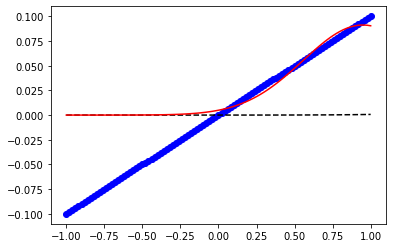

In [4]:
import matplotlib.pyplot as plt
from numpy import exp, loadtxt, pi, sqrt
import numpy as np
from lmfit import Model


x = np.linspace(-1., 1, 101)
y = np.linspace(-0.1, 0.1, 101)


def gaussian(x, amp, cen, wid):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (sqrt(2*pi) * wid)) * exp(-(x-cen)**2 / (2*wid**2))


gmodel = Model(gaussian)
result = gmodel.fit(y, x=x, amp=5, cen=5, wid=1)

print(result.fit_report())

plt.plot(x, y, 'bo')
plt.plot(x, result.init_fit, 'k--')
plt.plot(x, result.best_fit, 'r-')
plt.show()
# <end examples/doc_model_gaussian.py>

In [6]:
from scipy import interpolate
import numpy as np
x = np.arange(-5.01, 5.01, 0.25)

y = np.arange(-5.01, 5.01, 0.25)

xx, yy = np.meshgrid(x, y)

z = np.sin(xx**2+yy**2)

f = interpolate.interp2d(x, y, z, kind='cubic')

print(np.shape(z), np.shape(x))

(41, 41) (41,)


Horiz--> p:  -1.833807801346308 r:  10.273865379203967 y:  -0.3933996639675513
Horiz--> p:  -1.809626666271132 r:  10.283693784366728 y:  -0.3933996639675513
Horiz--> p:  -1.7652127467594652 r:  10.289384902758528 y:  -0.07035415716281339
Horiz--> p:  -1.7206173466948058 r:  10.296823737955712 y:  -0.11385715913354429
Horiz--> p:  -1.6258344412153654 r:  10.291201067603847 y:  0.8058901909052331
Horiz--> p:  -1.5107386104181741 r:  10.273158286505714 y:  1.4852689957272942
Horiz--> p:  -1.4061978337666008 r:  10.231686427678419 y:  3.0828253244975983
Horiz--> p:  -1.3186729724169106 r:  10.156671892552783 y:  4.886142461595157
Horiz--> p:  -1.2565770314145566 r:  10.074743806848263 y:  5.224322338601062
Horiz--> p:  -1.1779158880795146 r:  9.990229395710275 y:  5.140354410579381
Horiz--> p:  -1.1170974478753262 r:  9.817638588167089 y:  6.011902454377296
Horiz--> p:  -1.0745612033636835 r:  9.646694016242783 y:  6.076448738100722
Horiz--> p:  -1.0324595928771 r:  9.463025697674714 y:  

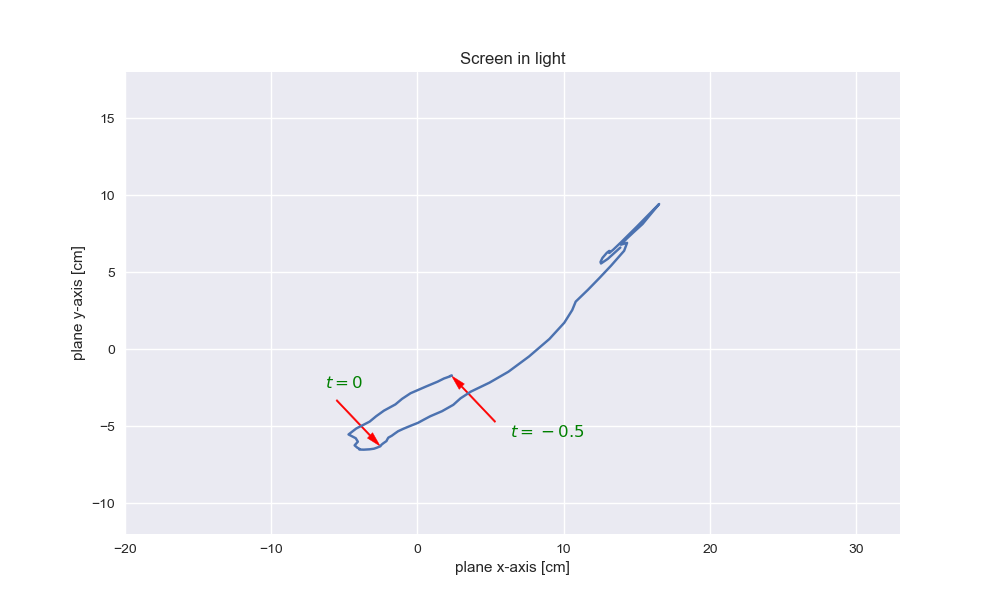

0

In [183]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.mosh import *
from src.mosh import rot as R
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import csv
import random
import matplotlib
from matplotlib import animation
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
from matplotlib.animation import FuncAnimation
from itertools import count
from matplotlib import cm
%matplotlib widget

import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.mosh import *
from src.mosh import rot as R
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import csv
import random
import matplotlib
from matplotlib import animation
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
from matplotlib.animation import FuncAnimation
from itertools import count
from matplotlib import cm
from scipy.interpolate import interp1d, interp2d, griddata
from mpl_toolkits.mplot3d import Axes3D
import os.path as op
%matplotlib widget

def yaw_ang_vel(yaw, dt):
    yaw_vel = []
    
    for i in range(1, len(yaw)):
        yaw_vel.append((yaw[i]-yaw[i-1])/dt)
        
    return yaw_vel


def interp_eye_mov(h_p_data, v_p_data, pitch, labl):
#     print(h_p_data[0])
    f = interp1d(h_p_data[0], h_p_data[1]) # Horizontal data
    f2 = interp1d(v_p_data[0], v_p_data[1]) # Vertical data
    xnew = np.linspace(np.min(h_p_data[0]), np.max(h_p_data[0]), num=45, endpoint=True)
    xnew2 = np.linspace(np.min(v_p_data[0]), np.max(v_p_data[0]), num=45, endpoint=True)
    plt.plot(h_p_data[0], h_p_data[1], 'o', v_p_data[0], v_p_data[1], 'o', xnew, f(xnew), '-', xnew2, f2(xnew2), '--')
    plt.legend(['horiz. data', 'vert. data', 'horiz. fit', 'vert. fit'], loc='best')
    plt.title(labl + " correction")
    plt.xlabel(labl + "[degrees]")
    plt.ylabel("Right eye movement[degrees]")
    plt.savefig("./plots/eye_corr_" + labl + ".svg")
    plt.close()
    
    if pitch < np.min(h_p_data[:][0]):
        h_p_out = f(np.min(h_p_data[:][0]))
    elif pitch > np.max(h_p_data[:][0]):
        h_p_out = f(np.max(h_p_data[:][0]))
    else:
        h_p_out = f(pitch)
        
    if pitch < np.min(v_p_data[:][0]):
        v_p_out = f2(np.min(v_p_data[:][0]))
    elif pitch > np.max(v_p_data[:][0]):
        v_p_out = f2(np.max(v_p_data[:][0]))
    else:
        v_p_out = f2(pitch)
    
    return h_p_out, v_p_out


def interp_eye_mov_yaw(yaw_vel, h_p_data, yaw_ind, labl):
#     print(h_p_data[0])
    f = interp1d(h_p_data[0], h_p_data[1]) # Horizontal data
    xnew = np.linspace(np.min(h_p_data[0]), np.max(h_p_data[0]), num=100, endpoint=True)
    plt.plot(h_p_data[0], h_p_data[1], 'o', xnew, f(xnew), '-')
    plt.legend(['horiz. data', 'horiz. fit'], loc='best')
    plt.title(labl + " correction")
    plt.xlabel(labl + "[degrees]")
    plt.ylabel("Right eye movement[degrees]")
    plt.savefig("./plots/eye_corr_" + labl + ".svg")
    plt.close()

    if yaw_ind == 0:
        yaw_velo = yaw_vel[0]
    else:
        yaw_velo = yaw_vel[yaw_ind - 1]
    
    if yaw_velo < np.min(h_p_data[:][0]):
        print(labl + " is out of range, so average horizontal correction!")
        head_vel = f(np.mean(yaw_vel))
        h_p_out = head_vel*0.166666666667
    elif yaw_velo > np.max(h_p_data[:][0]):
        print(labl + " is out of range, so average horizontal correction!")
        head_vel = f(np.mean(yaw_vel))
        h_p_out = head_vel*0.166666666667
    else:
        head_vel = f(yaw_velo)
        h_p_out = head_vel*0.166666666667
    
    return h_p_out



def eye_mov_corr(d, pitch, roll, yaw_vel, yaw_ind):
    
#     print("pitch and roll and yaw: ", (pitch, roll, yaw))
    
    h_p = np.array(np.loadtxt("eye_mov_data/Pitch_h.txt")).T
    v_p = np.array(np.loadtxt("eye_mov_data/Pitch_v.txt")).T

    h_r = np.array(np.loadtxt("eye_mov_data/Roll_h.txt")).T
    v_r = np.array(np.loadtxt("eye_mov_data/Roll_v.txt")).T
    
    h_y = np.array(np.loadtxt("eye_mov_data/Yaw_h.txt")).T

    pitch_h, pitch_v = interp_eye_mov(h_p, v_p, pitch, labl='Pitch')
    roll_h, roll_v = interp_eye_mov(h_r, v_r, roll, labl='Roll')
    yaw_h, yaw_v = interp_eye_mov_yaw(yaw_vel, h_y, yaw_ind, labl='Yaw_Vel'), 0.
    
#     print("pitch: ", pitch, "Roll: ", roll)
    print("Horiz--> p: ", pitch_h, "r: ", roll_h, "y: ", yaw_h)
#     print("Vert--> p: ", pitch_v, "r: ", roll_v, "y: ", yaw_v)
    
    eye_h, eye_v = pitch_h + roll_h + yaw_h, pitch_v + roll_v + 0.
#     print(eye_h, "   ", eye_v)
    # an initial eye axis vector
    # eye_axis = np.array([0, 1, 0])
    eye_axis = d 
    
    eye_model='sakatani+isa'

    azimuth, elevation = 0., 0. #get_eye_axis_azimuth_elevation(eye_model)

    R_eye_in_head = {}
    for eye in ['right']: # Add 'left' if you want left eye calculations as well. 
        # +- 1 for left/right eye axes
        s = 1 if eye == 'left' else -1
        R_eye_in_head[eye] = np.dot(Rz(s * azimuth), Rx(elevation))
    
    R_eye_in_orbit = np.dot(Rz(-eye_h), Rx(eye_v))
    R_eye_orbit_plus_eyeInhead = np.dot(R_eye_in_head[eye], R_eye_in_orbit)
    eye_axis_vec_inHead = np.dot(R_eye_orbit_plus_eyeInhead, eye_axis)

#     print("Eye axis: ", eye_axis_vec_inHead)

    return eye_axis_vec_inHead


def get_eye_axis_azimuth_elevation(eye_model='sakatani+isa'):
    """eye axis azimuth/elevation (Sakatani & Isa (2007) or Oommen & Stahl (2008))"""

    assert eye_model in ['oommen+stahl', 'sakatani+isa']

    if eye_model == 'oommen+stahl':
        azimuth = 64.
        elevation = 22.
    else:
        azimuth = 60.
        elevation = 30.

    return azimuth, elevation

def rotation_matrix(theta, axis='x'):
    """3D rotation matrix around on of the Cartesian axes (x/y/z)"""

    assert axis in ['x', 'y', 'z']

    rad = np.deg2rad(theta)
    c, s = np.cos(rad), np.sin(rad)

    if axis == 'x':
        R = np.array([[1, 0, 0],
                      [0, c, -s],
                      [0, s, c]])
    elif axis == 'y':
        R = np.array([[c, 0, s],
                      [0, 1, 0],
                      [-s, 0, c]])
    elif axis == 'z':
        R = np.array([[c, -s, 0],
                      [s, c, 0],
                      [0, 0, 1]])

    return R


def Rx(theta):
    return rotation_matrix(theta, 'x')


def Ry(theta):
    return rotation_matrix(theta, 'y')


def Rz(theta):
    return rotation_matrix(theta, 'z')

def load_data():
    # get head tilt and eye position data as Python dictionary

    data_file = './eye_mov_data/meyer_etal/data/example_freely_moving.npy'
    arr = np.load(data_file)

    # wrap into a dict
    data = {'timestamps': arr[:, 0],
            'pitch': arr[:, 1],
            'roll': arr[:, 2],
            'angular_head_velocity': {'pitch': arr[:, 3],
                                      'roll': arr[:, 4],
                                      'yaw': arr[:, 5]},
            'pupil': {'left': arr[:, [6, 7]],  # [horiz, vert]
                      'right': arr[:, [8, 9]]}}  # [horiz, vert]
    return data


def plane_data(name, L):

    L_data1 = np.loadtxt('./dat/'+name+'/'+name+'_1.txt')
    L_data2 = np.loadtxt('./dat/'+name+'/'+name+'_4.txt')

    D_data1 = np.loadtxt('./dat/'+name+'/'+name+'_2.txt')
    D_data2 = np.loadtxt('./dat/'+name+'/'+name+'_3.txt')

    L_data = (L_data1 + L_data2)/2.
    D_data = (D_data1 + D_data2)/2.
    
    if L==True:
        data = L_data
    else:
        data = D_data

    roll = []
    pitch = []
    yaw = []

    for i in range(len(data[0])):

        yaw.append(float(data[0][i]))
        pitch.append(float(data[1][i]))
        roll.append(float(data[2][i])) 
#     print(roll, pitch, yaw)
    dt = 0.02
    yaw_vel = yaw_ang_vel(yaw, dt)
#     print("Yaw Velooooooooooooooooooooooooooooo: ", yaw_vel)
    # print(roll)
    # print(pitch)
    # print(yaw)

    m = Symbol('m')

    p_0 = [1., 1., 1.]
    d_0 = [1./np.sqrt(2.), 1./np.sqrt(2.), 0.]
#     d = eye_mov_corr(d_0, pitch, roll, yaw)
#     r_e_H = r_e_h(p_0, d, m)
    
    degree = True
    xs = []
    ys = []
    zs = []
    x0, y0 = 20.*np.sqrt(2), 20.*np.sqrt(2)
    
    for i in range(len(roll)):
        phi = roll[i]
        theta = pitch[i]
        psi = yaw[i]
        d = eye_mov_corr(d_0, theta, phi, yaw_vel, i)
#         d = eye_mov_corr(d_0, 0, phi, 0)
        r_e_H = r_e_h(p_0, d, m)
        r = R(phi, theta, psi, degree)
#         r = R(phi, 0., 0., degree)
        r_e_I = np.matmul(r, r_e_H)
        mul = solve_m(x0, y0, r_e_I, m)
#         print(mul)
        r_e = lambdify(m, r_e_I)
        r_ = np.array(r_e(mul[m]))
        xs.append(r_[0][0])
        ys.append(r_[1][0])
        zs.append(r_[2][0])
    #     xs.append(0.)
    #     print(r_)

    # print(xs,'\n')
    # print(ys,'\n')
    # print(zs)

    # Rotating the plane
    rot_ang = np.arcsin(y0/np.sqrt(x0**2 + y0**2))
    # print(np.sin(rot_ang)**2)

    rot_ax = np.array([0., 0., 1.])
    # print(np.cross(rot_ax, v_in))

    x_p = []
    y_p = []

    for i in range(len(xs)):

        v_in = np.array([xs[i], ys[i], zs[i]])
        # print(v_in)

        v_fin = v_in*np.cos(rot_ang) + np.cross(rot_ax, v_in)*np.sin(rot_ang) + rot_ax*(np.dot(rot_ax, v_in))*(1 - np.cos(rot_ang))

        x_p.append(-v_fin[0]) #minus sign if looking from mouse perspective. 
        y_p.append(-v_fin[2]) #minus sign if looking from mouse perspective.
    
    vel = []
    
    for i in range(len(x_p)-1):
        u = 10*float(x_p[i+1]-x_p[i])
        v = 10*float(y_p[i+1]-y_p[i])
        vel.append(np.hypot(u,v))
#     vel.append(vel[-1]) # Just to make the dimensions of x_p, y_p and vel match
    return np.where(np.array(roll)==0.0)[0][0], x_p, y_p, vel

def velocity_ani_plot(x_p, y_p, L):
    if L==True:
        light = 'light'
    else:
        light = 'dark'
    
    fig2 = plt.figure(figsize=(10,6))
    axes = fig2.add_subplot(1,1,1)
    x, y, u, v = [], [], [], []
    def animate(i):
        if i<len(x_p)-1:
            x = x_p[i]
            y = y_p[i]
            u = 10*float(x_p[i+1]-x_p[i])
            v = 10*float(y_p[i+1]-y_p[i])
            axes.clear()
            axes.set_ylim(-12., 18.)
            axes.set_xlim(-20., 33)
            plt.style.use("seaborn")
            plt.xlabel('plane x-axis [cm]')
            plt.ylabel('plane y-axis [cm]')
            plt.title('Screen in '+light)
            plt.arrow(x, y, u, v, width=0.07, color='r', length_includes_head=True, head_width=0.3, head_length=0.5, label='Velocity vector')
            circ = plt.Circle((x, y), radius=np.hypot(u,v), color='b', fill=False, visible=True, lw=0.85)
            axes.add_artist(circ)
            plt.legend()
    #         plt.plot(x,y, scaley=True, scalex=True, color="blue")
    #         plt.quiver([x, y], u, v)

    ani = FuncAnimation(fig=fig2, func=animate, interval=20)
    f = r'./plots/animation_vector_field_'+light+'.gif'
    writergif = animation.PillowWriter(fps=15) 
    ani.save(f, writer=writergif)

def plot_plane(x_p, y_p, vel, light, name):
    # ind = np.where(np.array(roll)==0.0)[0][0]
    fig1 = plt.figure(figsize=(10,6))
    axes = fig1.add_subplot(1,1,1)
    plt.style.use("seaborn")
    # circ = plt.Circle((x_p[30], y_p[30]), radius=2., color='r', fill=False, visible=True, lw=0.85)
    # axes.add_artist(circ)
    plt.plot(x_p, y_p)
    # plt.scatter(x_p, y_p, c=cm.hot(vel), edgecolor='none')
    dx, dy = -3., -3.
    plt.arrow(x_p[ind]+dx, y_p[ind]-dy, -dx, dy, width=0.1, color='r', length_includes_head=True, head_width=0.5, head_length=1.)
    plt.text(x_p[ind]+dx-0.8, y_p[ind]-dy+0.8, r'$t = 0.$', color='green', size='large')
    plt.arrow(x_p[0]-dx, y_p[0]+dy, +dx, -dy, width=0.1, color='r', length_includes_head=True, head_width=0.5, head_length=1.)
    plt.text(x_p[0]-dx+1., y_p[0]+dy-1., r'$t = - 0.5$', color='green', size='large')
    plt.xlabel('plane x-axis [cm]')
    plt.ylabel('plane y-axis [cm]')
    plt.title('Screen in '+light)
    plt.ylim(-12., 18.)
    plt.xlim(-20., 33)
    plt.savefig('./plots/cell_' + light + '_' + name + '.svg', format='svg')
    plt.savefig('./plots/cell_' + light + '_' + name + '.pdf', format='pdf')
    # displaying the plot
    plt.show()
    return 0

############# Start Animation Section ##########################

# fig = plt.figure(figsize=(10,6))
#     axes = fig.add_subplot(1,1,1)
#     axes.set_ylim(-12., 18.)
#     axes.set_xlim(-20., 33)
#     plt.style.use("seaborn")
#     x,y=[],[]

# def animate(i):
    
#     if i<len(x_p):
#         x.append(x_p[i]) 
#         y.append(y_p[i])
#         dx, dy = -3., -3.
#         plt.arrow(x_p[ind]+dx, y_p[ind]-dy, -dx, dy, width=0.1, color='r', length_includes_head=True, head_width=0.5, head_length=1.)
#         plt.text(x_p[ind]+dx-0.8, y_p[ind]-dy+0.8, r'$t = 0.$', color='green', size='large')
#         plt.arrow(x_p[0]+dx, y_p[0]-dy, -dx, +dy, width=0.1, color='r', length_includes_head=True, head_width=0.5, head_length=1.)
#         plt.text(x_p[0]+dx-1., y_p[0]-dy+1., r'$t = - 0.5$', color='green', size='large')
#         plt.xlabel('plane x-axis [cm]')
#         plt.ylabel('plane y-axis [cm]')
#         plt.title('Screen')
#         plt.plot(x,y, scaley=True, scalex=True, color="blue")

# ani = FuncAnimation(fig=fig, func=animate, interval=20)
# f = r'./plots/animation_Light_'+name+'.gif'
# writergif = animation.PillowWriter(fps=15) 
# ani.save(f, writer=writergif)

############# End Animation Section ##########################

name = 'NewM1_11_42'
L = True
if L==True:
    light = 'light'
else:
    light = 'dark'
ind, x_p, y_p, vel = plane_data(name, L)

plot_plane(x_p, y_p, vel, light, name)
# velocity_ani_plot(x_p, y_p, L)


[ 0.30828199  1.32672694  0.19569851  4.30696389  4.68489252  9.05955635
 11.02784103  6.88095557  5.77156791  8.80283293  6.42847889  5.7598132
 10.13873523  6.5453713   5.5175861   2.6753656   3.25296746  2.40472164
  1.64933355  0.43847649  3.06682892  3.96101346  2.99101556  2.09735907
  2.54804649  1.29065682  1.75580504  2.36553823  1.16305595  1.44261434
  2.55945568  2.65639593  2.65999175  3.97443077  4.99606538  5.69451507
  4.22059783  5.14107889  8.69619644  8.74748889  6.53847462  8.21618885
 14.06202181 14.72480827 17.21924003 18.03244689 14.70147686  9.84484029
  5.95597011 11.3092046  10.87700114 11.45953373 13.13173259  5.53335125
  4.37698922  5.60798485  6.64331423  7.70608525  6.56674207  8.58040671
  2.12851114  6.10848802 14.90657349 15.08268302  7.27386614  3.301846
  1.08947723  0.41375459  2.08685501  4.44164924  2.95001791  1.05535762
  5.49392615 11.34986702]
min:  0.19569851409331446 max:  18.03244689241978


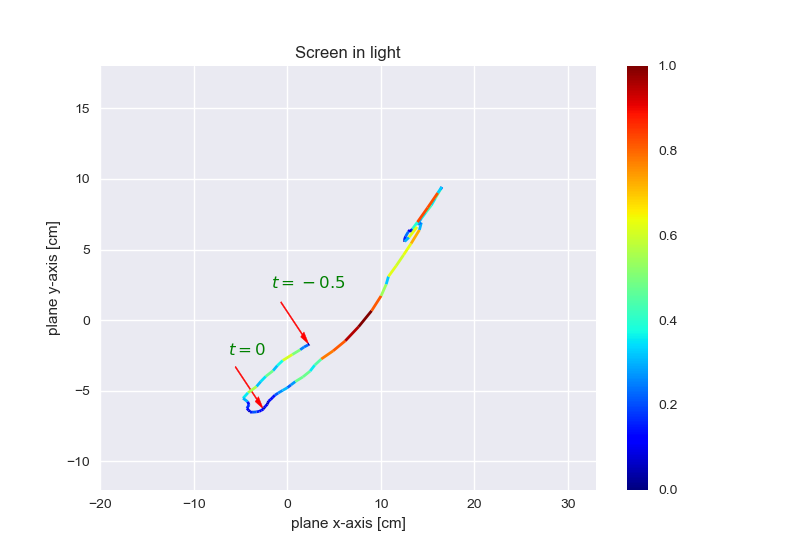

0

In [180]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

def plot_vel_wighted_plane(x_p, y_p, vel):
    
    points = np.array([x_p, y_p]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    fig, axs = plt.subplots(1, 1)

    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(np.min(vel), np.max(vel))
    lc = LineCollection(segments, cmap='jet', norm=norm)
    # Set the values used for colormapping
    lc.set_array(vel)
    lc.set_linewidth(2)
    line = axs.add_collection(lc)
    fig.colorbar(line, ax=axs)
    dx, dy = -3., -3.
    plt.arrow(x_p[ind]+dx, y_p[ind]-dy, -dx, dy, width=0.1, color='r', length_includes_head=True, head_width=0.5, head_length=1.)
    plt.text(x_p[ind]+dx-0.8, y_p[ind]-dy+0.8, r'$t = 0.$', color='green', size='large')
    plt.arrow(x_p[0]+dx, y_p[0]-dy, -dx, +dy, width=0.1, color='r', length_includes_head=True, head_width=0.5, head_length=1.)
    plt.text(x_p[0]+dx-1., y_p[0]-dy+1., r'$t = - 0.5$', color='green', size='large')
    plt.xlabel('plane x-axis [cm]')
    plt.ylabel('plane y-axis [cm]')
    plt.title('Screen in '+light)
    axs.set_xlim(-20., 33)
    axs.set_ylim(-12., 18.)
    plt.savefig('./plots/weighted_cell_' + light + '_' + name + '.svg', format='svg')
    plt.savefig('./plots/weighted_cell_' + light + '_' + name + '.pdf', format='pdf')
    plt.show()
    return 0

def scale(x, out_range=(-1, 1)):
    domain = np.min(x), np.max(x)
    y = (x - (domain[1] + domain[0]) / 2) / (domain[1] - domain[0])
    return y * (out_range[1] - out_range[0]) + (out_range[1] + out_range[0]) / 2

vel = np.array(vel)
print(vel)
print("min: ", np.min(vel), "max: ", np.max(vel))

vel = scale(vel, out_range=(0., 1.))
plot_vel_wighted_plane(x_p, y_p, vel)


# New Polar Plots

In [178]:
def make_polar_plot(x_p, y_p, name, L, init_t, fin_t):
    
    if L==True:
        light = 'light'
    else:
        light = 'dark'
    
    r = []
    thet = []
    u_list = []
    v_list = []
    for i in range(len(x_p)-1):
        u = float(x_p[i+1]-x_p[i])
        v = float(y_p[i+1]-y_p[i])
        u_list.append(u)
        v_list.append(v)
        r.append(np.sqrt(u**2 + v**2))
        thet.append(np.arctan2(v, u))

    avg_vel_mod = [0., np.max(r)] #8*np.sqrt(np.mean(u_list)**2 + np.mean(v_list)**2)]
    avg_vel_ang = [0., np.arctan2(np.mean(v_list[init_t:fin_t]), np.mean(u_list[init_t:fin_t]))]

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.scatter(thet[0:24], r[0:24], label='$-0.5 < t < 0.$')
    ax.scatter(thet[25:49], r[25:49], label='$0. < t < 0.5$')
    ax.scatter(thet[50:], r[50:], label='$0.5 < t < 1.$')
    ax.plot(avg_vel_ang, avg_vel_mod, color='r', linewidth=2, linestyle='dashed', label='Average angle in '+light+': '+str(round(avg_vel_ang[1]*180/np.pi, 2))+' degrees')
    ax.legend(loc=9)
    ax.grid(True)
    ax.set_title("Distribution of projected eye movement velocity on the screen - "+name, va='bottom')
    plt.savefig('./plots/polar/'+name+'_'+light+'.svg', format='svg')
    plt.close()
    return round(avg_vel_ang[1]*180/np.pi, 3)



cell_list = !ls ./dat
# print(cell_list)
angles = []

init_t = 24
fin_t = 74
for i in range(len(cell_list)):
    
    name = cell_list[i]
    
    L = True
    ind, x_p, y_p, vel = plane_data(name, L)
    angles.append([name, 'light', make_polar_plot(x_p, y_p, name, L, init_t, fin_t)])
    
    L = False
    ind, x_p, y_p, vel = plane_data(name, L)
    angles.append([name, 'dark', make_polar_plot(x_p, y_p, name, L, init_t, fin_t)])
    
print(angles)


Horiz--> p:  0.8579376401688201 r:  9.770992643791862 y:  0.5515516149145417
Horiz--> p:  0.7875948999344089 r:  9.71965456180232 y:  0.5515516149145417
Horiz--> p:  0.7243935150090539 r:  9.670648723793807 y:  0.5512394115031254
Horiz--> p:  0.6575558122214382 r:  9.618416243842631 y:  0.527656175621427
Horiz--> p:  0.582280655913161 r:  9.575224764477397 y:  0.4173455769199653
Horiz--> p:  0.511814852192916 r:  9.525913708236239 y:  0.3641282700892617
Horiz--> p:  0.45303398495043873 r:  9.45597708062269 y:  0.6135697282889547
Horiz--> p:  0.39283255527176647 r:  9.39924349607318 y:  0.3947956613820398
Horiz--> p:  0.33634580349193155 r:  9.353663277664431 y:  -0.1165824442973728
Horiz--> p:  0.2906036017865407 r:  9.319872636416873 y:  -0.1751318636502233
Horiz--> p:  0.23450794480552675 r:  9.281851218008935 y:  -0.1870462865849532
Horiz--> p:  0.17310897269877104 r:  9.241322164545878 y:  -0.07973497315659148
Horiz--> p:  0.10148418033108969 r:  9.183681914770219 y:  0.49453436792

Horiz--> p:  -1.5911392153471249 r:  8.644313315692909 y:  1.005209349112406
Horiz--> p:  -1.7359051634553229 r:  8.676504780040085 y:  1.1489450785786914
Horiz--> p:  -1.82743282139003 r:  8.702408610328611 y:  1.1380248664753885
Horiz--> p:  -1.9254938254999205 r:  8.733170049425615 y:  1.1653197123677177
Horiz--> p:  -2.0228842226781296 r:  8.766983698382742 y:  1.2263965894798687
Horiz--> p:  -2.120614906288081 r:  8.79967962749638 y:  1.3171401725860905
Horiz--> p:  -2.2106047138687193 r:  8.830150865890841 y:  1.413022653131803
Horiz--> p:  -2.3016198979794456 r:  8.849653908891144 y:  1.3916104050037539
Horiz--> p:  -2.403504677340319 r:  8.877261703447155 y:  1.3730459578961527
Horiz--> p:  -2.530302564810037 r:  8.907519508646 y:  1.399772802692872
Horiz--> p:  -2.6592495961159233 r:  8.940663053204295 y:  1.3670910323996086
Horiz--> p:  -2.7792976194821644 r:  8.982363464784173 y:  1.2213416307725882
Horiz--> p:  -2.8632275559196376 r:  9.013817620206746 y:  1.250768503243520

Horiz--> p:  -0.6238401535832094 r:  8.601213498317943 y:  -1.1769736806555198
Horiz--> p:  -0.6070055385731392 r:  8.630781381285086 y:  -0.8118958229170342
Horiz--> p:  -0.5916123751297825 r:  8.656618577441652 y:  -0.617173980722164
Horiz--> p:  -0.5804877115722749 r:  8.67528695653989 y:  -0.26470430815362567
Horiz--> p:  -0.5664427743089998 r:  8.691055054478271 y:  -0.313962192178057
Horiz--> p:  -0.5476600999543982 r:  8.711149265230533 y:  -0.6267551878805441
Horiz--> p:  -0.5342638141222247 r:  8.737431906029371 y:  -0.7402430532932107
Horiz--> p:  -0.5206931928169494 r:  8.77852309587314 y:  -0.9651277513234153
Horiz--> p:  -0.5096227016852677 r:  8.820143104829851 y:  -0.9088067009482184
Horiz--> p:  -0.5075815576811868 r:  8.860572966299621 y:  -1.2779377431879209
Horiz--> p:  -0.5001299631546319 r:  8.880952854661604 y:  -0.8779469487834228
Horiz--> p:  -0.48190499081286264 r:  8.916322155438305 y:  -1.0973172507406705
Horiz--> p:  -0.46241938896745527 r:  8.93113474158246

Horiz--> p:  -0.771050075481957 r:  8.548117482253879 y:  0.39754690592467845
Horiz--> p:  -0.7641031718476121 r:  8.526539290199626 y:  0.41491750011302525
Horiz--> p:  -0.7584000315494918 r:  8.503499190002909 y:  0.3516354372852364
Horiz--> p:  -0.7569617266931654 r:  8.493119585993243 y:  0.053620554445216434
Horiz--> p:  -0.7573772190058055 r:  8.469922959109528 y:  0.4658053332380612
Horiz--> p:  -0.7596285405571743 r:  8.454273789675643 y:  0.2902705094405061
Horiz--> p:  -0.758633724238774 r:  8.45130914989686 y:  -0.15667961856054494
Horiz--> p:  -0.75389705381305 r:  8.451081015359774 y:  -0.20966828847033747
Horiz--> p:  -0.7530356686655948 r:  8.454449890056967 y:  -0.22890781885368539
Horiz--> p:  -0.7481380686538955 r:  8.453429910613043 y:  -0.17447449696563938
Horiz--> p:  -0.7425745509808854 r:  8.452385520495394 y:  -0.1691261408560135
Horiz--> p:  -0.7323256719221498 r:  8.455301731439294 y:  -0.23288151166805507
Horiz--> p:  -0.7250957310093663 r:  8.460570230847486

Horiz--> p:  -0.36170518817282105 r:  8.580360974453884 y:  -0.12324818417417137
Horiz--> p:  -0.3438780531585425 r:  8.57520745986748 y:  0.056659377085925944
Horiz--> p:  -0.3262940402803193 r:  8.567389349266968 y:  0.055959622649325864
Horiz--> p:  -0.314936146010912 r:  8.572693127091807 y:  -0.13950421786378153
Horiz--> p:  -0.29834847660786173 r:  8.589205187094894 y:  -0.22058063165261646
Horiz--> p:  -0.2835405402749792 r:  8.596677734854083 y:  -0.189014478355687
Horiz--> p:  -0.2727252509676097 r:  8.602231903686667 y:  -0.20536586553089337
Horiz--> p:  -0.2661345576488384 r:  8.608056491142491 y:  -0.2402919789114477
Horiz--> p:  -0.2574269671032434 r:  8.60967091440998 y:  -0.18545556989616344
Horiz--> p:  -0.2470780222933121 r:  8.598877980191693 y:  -0.11164095945977892
Horiz--> p:  -0.23569366808581446 r:  8.597024528948216 y:  -0.19320564400325185
Horiz--> p:  -0.2257452801492283 r:  8.601018144973521 y:  -0.2206275109565081
Horiz--> p:  -0.22085213990459623 r:  8.6096

Horiz--> p:  -0.775627044325981 r:  7.176851318886056 y:  0.1297878843528935
Horiz--> p:  -0.8395225304400302 r:  7.177321122042243 y:  0.0012186590167913704
Horiz--> p:  -0.930765036587882 r:  7.181328697775202 y:  0.07927399570359155
Horiz--> p:  -1.0195075328681822 r:  7.195108811037269 y:  -0.11205095858944308
Horiz--> p:  -1.0762394848692631 r:  7.217406420767499 y:  -0.21019623213306474
Horiz--> p:  -1.103702299495624 r:  7.249899169709221 y:  -0.36441632664077334
Horiz--> p:  -1.1218527825832396 r:  7.280318150018426 y:  -0.25299265479707456
Horiz--> p:  -1.1526549228874017 r:  7.319721523301653 y:  -0.5227634177561162
Horiz--> p:  -1.1911718179538926 r:  7.371452822068143 y:  -1.0401129122177857
Horiz--> p:  -1.21951702341114 r:  7.425426664750291 y:  -1.219530887570609
Horiz--> p:  -1.2498776046629976 r:  7.477625555091192 y:  -1.1945956370446136
Horiz--> p:  -1.2885789455448853 r:  7.529443990179455 y:  -1.0249983468741735
Horiz--> p:  -1.3121501043173613 r:  7.57902405176339

Horiz--> p:  -0.84587642173319 r:  8.815837877343332 y:  -1.3957836280014513
Horiz--> p:  -0.8308960540900878 r:  8.827483591356922 y:  -1.4666949470567043
Horiz--> p:  -0.8080325912563093 r:  8.852456478743035 y:  -1.7563696923518732
Horiz--> p:  -0.7802226662288582 r:  8.887927461159506 y:  -2.042793888630436
Horiz--> p:  -0.7722354743453465 r:  8.92288160155991 y:  -1.9768922251190608
Horiz--> p:  -0.7778247587024832 r:  8.92385877753162 y:  -1.3218518612573777
Horiz--> p:  -0.7803843073930137 r:  8.882936834652362 y:  -0.5348822691785982
Horiz--> p:  -0.7820481521966995 r:  8.814213385459944 y:  0.18788358697058238
Horiz--> p:  -0.7880555852064091 r:  8.734355425543255 y:  0.42739656178290236
Horiz--> p:  -0.8124325354489601 r:  8.652695848636005 y:  0.4426046380273811
Horiz--> p:  -0.8325124616212989 r:  8.576526208346829 y:  0.2738173590692698
Horiz--> p:  -0.8762010559456518 r:  8.503550675410285 y:  0.2009358288445942
Horiz--> p:  -0.8988150117707667 r:  8.415148327544708 y:  0

Horiz--> p:  0.01383430126072227 r:  7.977218299282995 y:  -0.2419744716566724
Horiz--> p:  0.01551634622882414 r:  8.001662838503643 y:  -0.1997055640741713
Horiz--> p:  0.014078991810031916 r:  8.002693418078614 y:  0.1825337407390766
Horiz--> p:  0.015604545944326698 r:  7.980043602876619 y:  0.674204227324578
Horiz--> p:  0.006526225621030279 r:  7.943605946445261 y:  0.8494660368684229
Horiz--> p:  -0.034047726968319925 r:  7.919118062260136 y:  0.7296648206917434
Horiz--> p:  -0.07180229810067701 r:  7.906000299828932 y:  0.5824707156737429
Horiz--> p:  -0.08735577391568433 r:  7.882641809613323 y:  0.6143875733482744
Horiz--> p:  -0.06676611749497174 r:  7.846958699090384 y:  0.7488588619580896
Horiz--> p:  -0.052256917051709706 r:  7.813028584217032 y:  0.6106394832005058
Horiz--> p:  -0.046809369268972945 r:  7.787743819531143 y:  0.4767483129955609
Horiz--> p:  -1.833807801346308 r:  10.273865379203967 y:  -0.3933996639675513
Horiz--> p:  -1.809626666271132 r:  10.28369378436

Horiz--> p:  -1.055305429038468 r:  7.931793054647395 y:  -1.859753884516566
Horiz--> p:  -1.0054472558027816 r:  8.009728394538707 y:  -2.231341500864387
Horiz--> p:  -0.9436016859485497 r:  8.079962906992328 y:  -2.2457506581357083
Horiz--> p:  -0.86545703065969 r:  8.185071026208306 y:  -2.2038887384866275
Horiz--> p:  -0.7869820918770132 r:  8.316666663811283 y:  -2.7082994094861705
Horiz--> p:  -0.7425745509808854 r:  8.452385520495394 y:  -2.8065239523754437
Horiz--> p:  -0.6961235647149229 r:  8.585919851196655 y:  -2.892785269985269
Horiz--> p:  -0.6512180056482562 r:  8.718383446702019 y:  -3.0325832988031123
Horiz--> p:  -0.6093646679992895 r:  8.850597714171224 y:  -3.4845618260148883
Horiz--> p:  -0.5724751375738255 r:  8.990232180203947 y:  -3.916658226886435
Horiz--> p:  -0.5342569169098687 r:  9.146258166029927 y:  -4.409411443348778
Horiz--> p:  -0.4928205009315885 r:  9.292524131200892 y:  -3.944912583312055
Horiz--> p:  -0.44605824675467304 r:  9.412726892380501 y:  -

Horiz--> p:  -1.1214178563652566 r:  8.52039290190788 y:  -0.1970285496553641
Horiz--> p:  -1.0977859168056163 r:  8.533897088166933 y:  -0.4597806679326453
Horiz--> p:  -1.0696974741982157 r:  8.539404723465168 y:  -0.32940104640745255
Horiz--> p:  -1.05222998673544 r:  8.545166076281191 y:  -0.3550063316941632
Horiz--> p:  -1.0477931124807438 r:  8.54802435114393 y:  -0.3082433129832405
Horiz--> p:  -1.0549289864572295 r:  8.547864804896523 y:  -0.3145382083962346
Horiz--> p:  -1.074207180688634 r:  8.5632898937724 y:  -0.7167260343721165
Horiz--> p:  -1.1031346641325537 r:  8.564689042914873 y:  -0.2549030980363594
Horiz--> p:  -1.1366989356845125 r:  8.566002194470634 y:  -0.30750715352324015
Horiz--> p:  -1.178606199689464 r:  8.551154502435164 y:  -0.1149400684177191
Horiz--> p:  -1.225756362116158 r:  8.543244478031719 y:  -0.13486613971872624
Horiz--> p:  -1.259836516652963 r:  8.529445162373511 y:  -0.09173163649701938
Horiz--> p:  -1.296978937374048 r:  8.518234875510512 y:  

Horiz--> p:  -0.6248306312989521 r:  9.066406642914998 y:  0.6702530887327047
Horiz--> p:  -0.6359061890096896 r:  9.031723687308833 y:  0.6770140041800162
Horiz--> p:  -0.6395167173643126 r:  8.997639445801493 y:  0.5905958828430601
Horiz--> p:  -0.6302381524410818 r:  8.956804177590127 y:  0.6260701685987962
Horiz--> p:  -0.6213083929431168 r:  8.910961551940492 y:  0.7461341093708808
Horiz--> p:  -0.6140841615043663 r:  8.872634662208476 y:  0.6792430010538417
Horiz--> p:  -0.6171875690322854 r:  8.834337324818218 y:  0.6625322069702063
Horiz--> p:  -0.6154666029909902 r:  8.804899000212826 y:  0.5262396663834933
Horiz--> p:  -0.6158040331707503 r:  8.773490160815141 y:  0.49935360770412224
Horiz--> p:  -0.6116926855043882 r:  8.76116211301925 y:  -0.0068558898813040154
Horiz--> p:  -0.6141508120632434 r:  8.739432373684258 y:  0.2289112669670423
Horiz--> p:  -0.6266189816514459 r:  8.720060681663758 y:  0.3582685518424507
Horiz--> p:  -0.6430293252209296 r:  8.701750996201492 y:  0

Horiz--> p:  -0.6207381933988845 r:  8.343998682413934 y:  0.6670028475651102
Horiz--> p:  -0.6247825979248804 r:  8.305415767023652 y:  0.8489062109353178
Horiz--> p:  -0.6248628360907124 r:  8.22163477128958 y:  1.37055709407263
Horiz--> p:  -0.6356930103688756 r:  8.12235723543592 y:  1.4669600061729708
Horiz--> p:  -0.6420446297166017 r:  8.060816860139422 y:  1.3432752318484797
Horiz--> p:  -0.6581429630677181 r:  8.043046792762022 y:  0.7293328089096375
Horiz--> p:  -0.6815344868072737 r:  8.065128740018466 y:  -0.18331839665804603
Horiz--> p:  -0.6981040734748274 r:  8.076769270315582 y:  -0.1006098300388669
Horiz--> p:  -0.7093878317431819 r:  8.119345822135191 y:  -0.6347534565532836
Horiz--> p:  -0.7262799571255367 r:  8.163125588536248 y:  -0.3620539284564034
Horiz--> p:  -0.7473163191726968 r:  8.208975109063202 y:  -0.5587344149280873
Horiz--> p:  -0.7547751628360918 r:  8.189493505476891 y:  0.38040129054608074
Horiz--> p:  -0.7627906125522377 r:  8.208885526287714 y:  -0

Horiz--> p:  -2.6983726712098433 r:  7.524060717737267 y:  -1.8195178677439334
Horiz--> p:  -2.703479193924599 r:  7.531796722965206 y:  -2.0595597021350707
Horiz--> p:  -2.703246205291324 r:  7.561640912785298 y:  -2.4263700032754523
Horiz--> p:  -2.692314966744675 r:  7.622741418857487 y:  -2.932657836237543
Horiz--> p:  -2.677883055132847 r:  7.659780904892856 y:  -2.902510913766956
Horiz--> p:  -2.678093423510463 r:  7.6970271708020475 y:  -2.8483833080621217
Horiz--> p:  -2.686878942305837 r:  7.729363923049166 y:  -2.454884863806481
Horiz--> p:  -2.667501677300815 r:  7.767570590971797 y:  -2.6249160398607216
Horiz--> p:  -0.28080324447897015 r:  8.039043731725181 y:  -0.23227607326536068
Horiz--> p:  -0.29804914781846276 r:  8.066697417442972 y:  -0.23227607326536068
Horiz--> p:  -0.3148540602298194 r:  8.137632074600308 y:  -1.2929069703712466
Horiz--> p:  -0.33976334533438135 r:  8.202400006150807 y:  -0.7946987932432035
Horiz--> p:  -0.3667893187346516 r:  8.269756356664878 y

Horiz--> p:  -0.7068016630596217 r:  8.47041902855961 y:  0.19017973086701048
Horiz--> p:  -0.7195634637893701 r:  8.458036352487152 y:  0.023877832644070302
Horiz--> p:  -0.7277512820552734 r:  8.45324447291641 y:  -0.1616714582772038
Horiz--> p:  -0.7425745509808854 r:  8.452385520495394 y:  -0.18145419129040324
Horiz--> p:  -0.766245087452776 r:  8.443356026528235 y:  -0.11872631561311806
Horiz--> p:  -0.8029633284903666 r:  8.437976945151078 y:  -0.1624355813048152
Horiz--> p:  -0.8797958138689325 r:  8.42499944411107 y:  -0.07604883106619227
Horiz--> p:  -0.9459674319757116 r:  8.409267257114598 y:  0.03863108835338886
Horiz--> p:  -0.9818692958878296 r:  8.380597463274734 y:  0.4621155168484641
Horiz--> p:  -1.011332690173882 r:  8.366902241093706 y:  0.1785618630835583
Horiz--> p:  -1.0341769411095172 r:  8.368348124922512 y:  -0.15405204885420268
Horiz--> p:  -1.056496801238294 r:  8.36347478256707 y:  -0.07208071220566693
Horiz--> p:  -1.0848485317152075 r:  8.360405321415348 

Horiz--> p:  -0.4830365542671561 r:  8.697280767622132 y:  -0.9332486866368818
Horiz--> p:  -0.47649884948451615 r:  8.715509982384104 y:  -0.45616953446221825
Horiz--> p:  -0.46240322215767743 r:  8.733150429846814 y:  -0.5342675224298562
Horiz--> p:  -0.4357576262617743 r:  8.739079139017953 y:  -0.39302018909952036
Horiz--> p:  -0.42020544796856174 r:  8.735102445514002 y:  -0.2240511548739647
Horiz--> p:  -0.407289680408609 r:  8.736913017331739 y:  -0.32266959525118494
Horiz--> p:  -0.39908177989672955 r:  8.737927894737131 y:  -0.27797276854494657
Horiz--> p:  -0.38429802259403384 r:  8.745347779086538 y:  -0.576738721914212
Horiz--> p:  -0.3628320237164634 r:  8.76725870546067 y:  -1.0768375362023999
Horiz--> p:  -0.3450708862888242 r:  8.789911969513813 y:  -1.053424406007189
Horiz--> p:  -0.33396259037538234 r:  8.82045751778372 y:  -1.1567415583164835
Horiz--> p:  -0.3207135681033956 r:  8.852241798231441 y:  -1.1582058552648524
Horiz--> p:  -0.3013691385437307 r:  8.88155695

Horiz--> p:  -0.6950390095962202 r:  8.29355246869385 y:  -0.1938615557846635
Horiz--> p:  -0.6961622437106156 r:  8.300370028893424 y:  -0.2116068619838262
Horiz--> p:  -0.6989313109449515 r:  8.30817786369862 y:  -0.2181684177876057
Horiz--> p:  -0.7039824736108917 r:  8.318195531332933 y:  -0.23120297895898886
Horiz--> p:  -0.7085891055627678 r:  8.331850097959514 y:  -0.24864634390717846
Horiz--> p:  -0.7125049789206497 r:  8.340660698823559 y:  -0.2208781025728117
Horiz--> p:  -0.7180350197655982 r:  8.344992337387438 y:  -0.1843631990158422
Horiz--> p:  -0.7227887048903348 r:  8.347645276769972 y:  -0.18490822480925428
Horiz--> p:  -0.7257537256862916 r:  8.354601339221617 y:  -0.20991295488835576
Horiz--> p:  -0.7289019368135268 r:  8.364632107114586 y:  -0.22353604739732738
Horiz--> p:  -0.7310733402067382 r:  8.375004009024387 y:  -0.2346323139567832
Horiz--> p:  -0.7324657022820633 r:  8.387977481634554 y:  -0.25297494802734233
Horiz--> p:  -0.7338104279219118 r:  8.401129228

Horiz--> p:  -0.6575062580117785 r:  8.47716722026773 y:  -0.2887631651523563
Horiz--> p:  -0.648610285366267 r:  8.494979749987566 y:  -0.25337042787234715
Horiz--> p:  -0.6393235718619539 r:  8.510828265843912 y:  -0.24630586536212257
Horiz--> p:  -0.6261198480459925 r:  8.525984802809717 y:  -0.31432529985164587
Horiz--> p:  -0.6126274650367542 r:  8.529815030541823 y:  -0.19818200368246935
Horiz--> p:  -0.5964470055572665 r:  8.5376593163354 y:  -0.254893362853181
Horiz--> p:  -0.5749982823529263 r:  8.549466249254213 y:  -0.31185876214795977
Horiz--> p:  -0.5508856293123144 r:  8.568457357934685 y:  -0.684295762678346
Horiz--> p:  -0.5204407052580553 r:  8.58570151552163 y:  -0.954703922974725
Horiz--> p:  -0.4819046497284016 r:  8.608896469498177 y:  -1.2525503052446825
Horiz--> p:  -0.4484403503699047 r:  8.636015274744924 y:  -1.271185638737219
Horiz--> p:  -0.43011026605816266 r:  8.663581942645958 y:  -1.21933478403621
Horiz--> p:  -0.4173418593585111 r:  8.696591963542096 y:

Horiz--> p:  -0.6764040951019454 r:  8.909743592308024 y:  -1.0412879661158314
Horiz--> p:  -0.6649756851963495 r:  8.919496824839637 y:  -0.6603489167826084
Horiz--> p:  -0.653515935183743 r:  8.921707859919733 y:  -0.7135771193418462
Horiz--> p:  -0.6430852708821913 r:  8.911808335284741 y:  -0.4261929660122
Horiz--> p:  -0.6442905939733763 r:  8.898573806692879 y:  -0.34935926932222106
Horiz--> p:  -0.6534475830786879 r:  8.892494119517838 y:  -0.44920498765143496
Horiz--> p:  -0.657976810350593 r:  8.892288529538948 y:  -0.7648656504803778
Horiz--> p:  -0.6498811630394363 r:  8.893243962911901 y:  -0.9296429148275593
Horiz--> p:  -0.6346977643490486 r:  8.895349772688562 y:  -0.930106711584924
Horiz--> p:  -0.6102468089899844 r:  8.901093903895543 y:  -1.0190913672522526
Horiz--> p:  -0.6219179585719739 r:  8.648938753142748 y:  -0.08089210876382553
Horiz--> p:  -0.6265705910882359 r:  8.641120641688174 y:  -0.08089210876382553
Horiz--> p:  -0.6308666197643217 r:  8.636777642138014

Horiz--> p:  -0.7182799589279193 r:  8.544288393838212 y:  0.02605586798022179
Horiz--> p:  -0.7190728193021183 r:  8.52268597711946 y:  -0.04439486876505036
Horiz--> p:  -0.7215872554379658 r:  8.508433431406695 y:  -0.13897939884333935
Horiz--> p:  -0.7258448824616552 r:  8.495543442015752 y:  -0.14603377357108765
Horiz--> p:  -0.7306720203037819 r:  8.482015104376478 y:  -0.12767585649436483
Horiz--> p:  -0.7364606710094185 r:  8.464609973897392 y:  -0.10419043972285381
Horiz--> p:  -0.7425745509808854 r:  8.452385520495394 y:  -0.13630565375787632
Horiz--> p:  -0.7516359492931359 r:  8.444165578870011 y:  -0.17183588497531704
Horiz--> p:  -0.7620526196513889 r:  8.437347160699941 y:  -0.16670833756025125
Horiz--> p:  -0.7736306197648681 r:  8.428562047660984 y:  -0.16498380017179798
Horiz--> p:  -0.7851138284139122 r:  8.420980227073722 y:  -0.19055090389585336
Horiz--> p:  -0.8020051083087346 r:  8.415763334437036 y:  -0.21534520343234406
Horiz--> p:  -0.8234061853491141 r:  8.413

Horiz--> p:  -0.7708890054701851 r:  8.132412992011472 y:  0.34028169314568196
Horiz--> p:  -0.7712519805708503 r:  8.129943540539902 y:  0.4117773419429942
Horiz--> p:  -0.769078867752617 r:  8.132346638341957 y:  0.3153806437293114
Horiz--> p:  -0.7744584676226489 r:  8.133413937647294 y:  0.3513058955507811
Horiz--> p:  -0.7763668234089858 r:  8.138361338571158 y:  0.21231829809545405
Horiz--> p:  -0.7806882454395409 r:  8.143959541582788 y:  0.06922009692101068
Horiz--> p:  -0.780530632053511 r:  8.140935812775734 y:  0.3389747690103082
Horiz--> p:  -0.782519201343515 r:  8.13997781221073 y:  0.34151448121098305
Horiz--> p:  -0.7807092684458277 r:  8.144364435242244 y:  0.30386424937277207
Horiz--> p:  -0.7780631139136861 r:  8.148729278019678 y:  0.21179491677217677
Horiz--> p:  -0.7748965169616169 r:  8.147611761958323 y:  0.244825113923366
Horiz--> p:  -0.7691085405227762 r:  8.151999990438723 y:  0.05154037968835684
Horiz--> p:  -0.7662575979348674 r:  8.158743212783516 y:  -0.

Horiz--> p:  -0.7234201509152329 r:  8.440698915618091 y:  -0.12969609784892389
Horiz--> p:  -0.7231237529961565 r:  8.449088525671012 y:  -0.08830605480768418
Horiz--> p:  -0.7253858554335217 r:  8.451984737591339 y:  -0.010267507656204688
Horiz--> p:  -0.7262267828569557 r:  8.454607785708717 y:  0.0555585268536397
Horiz--> p:  -0.7306337489151359 r:  8.454189367818637 y:  0.09794871119210441
Horiz--> p:  -0.735539028859423 r:  8.460273853827925 y:  0.0600822702091242
Horiz--> p:  -0.7376042226392531 r:  8.47315904344306 y:  -0.11454161883228085
Horiz--> p:  -0.7401067508671902 r:  8.48015133876252 y:  0.11196541272921974
Horiz--> p:  -0.744201324590696 r:  8.48500651617294 y:  0.06798163457282329
Horiz--> p:  -0.7441624384279637 r:  8.486319655432633 y:  0.09060901820193168
Horiz--> p:  -0.7432016436419073 r:  8.476486164078928 y:  0.34380786833479177
Horiz--> p:  -0.7409758429494704 r:  8.474739391240442 y:  0.08829657026283962
Horiz--> p:  -0.7368916143906605 r:  8.475994159929876

Horiz--> p:  -0.7813761535180359 r:  8.452012494743398 y:  -0.13998478549568502
Horiz--> p:  -0.784393299467995 r:  8.45432187003876 y:  -0.1528123201765573
Horiz--> p:  -0.7855044107322917 r:  8.455357874398898 y:  -0.15506222960631647
Horiz--> p:  -0.7865504663998709 r:  8.4579670062901 y:  -0.14942524872180762
Horiz--> p:  -0.7849074374179905 r:  8.4533191972556 y:  -0.11460673782337176
Horiz--> p:  -0.7793544717612446 r:  8.455568765755872 y:  -0.17596193324659654
Horiz--> p:  -0.7732087204400485 r:  8.453184374497573 y:  -0.12851561431823202
Horiz--> p:  -0.7646517649487957 r:  8.45410574395136 y:  -0.15269386803965054
Horiz--> p:  -0.7574510908902996 r:  8.448338362637452 y:  -0.10146916256139264
Horiz--> p:  -0.7508507362101504 r:  8.444055846747727 y:  -0.053831319378603644
Horiz--> p:  -0.7478467058172915 r:  8.434053722149132 y:  -0.016967609030488773
Horiz--> p:  -0.7447798708162546 r:  8.434527692849437 y:  -0.15895150370447006
Horiz--> p:  -0.7416776131644801 r:  8.4335046

Horiz--> p:  -1.2509184798670372 r:  9.23336901653554 y:  -0.5111646111162744
Horiz--> p:  -1.257678497756653 r:  9.225180199024178 y:  -0.28628227797780165
Horiz--> p:  -1.265344089852166 r:  9.212107589106141 y:  -0.21911145297047924
Horiz--> p:  -1.2711184404122318 r:  9.20081944895796 y:  -0.21783221864679664
Horiz--> p:  -1.2731049111226065 r:  9.188724337174246 y:  -0.1819815999017819
Horiz--> p:  -1.2813303237950668 r:  9.181185771699305 y:  -0.22344498785210454
Horiz--> p:  -1.2853201016702558 r:  9.173669837885836 y:  -0.2470296133632151
Horiz--> p:  -1.2942439419687932 r:  9.168613632661208 y:  -0.2414566091200625
Horiz--> p:  -1.3063952838289432 r:  9.16682354188843 y:  -0.2465831789597444
Horiz--> p:  -1.3169421950177354 r:  9.16124209989202 y:  -0.21585202927945207
Horiz--> p:  -1.3246108422090563 r:  9.154388409997402 y:  -0.19808371763837823
Horiz--> p:  -0.42573380707658026 r:  8.149102468318974 y:  -0.5189696662415011
Horiz--> p:  -0.4417651951089417 r:  8.169811671238

Horiz--> p:  -0.6880407563184003 r:  8.38366962800748 y:  -0.1508813980216267
Horiz--> p:  -0.6987990876104784 r:  8.376055325734688 y:  -0.1081471224735445
Horiz--> p:  -0.70155789176537 r:  8.396973000220811 y:  0.1144572828923312
Horiz--> p:  -0.7110883061186322 r:  8.425206701547967 y:  0.14209606567447747
Horiz--> p:  -0.7245017431997084 r:  8.440712944608869 y:  0.5110711899042262
Horiz--> p:  -0.7326547866806299 r:  8.458180654587856 y:  0.6694952414541973
Horiz--> p:  -0.7425745509808854 r:  8.452385520495394 y:  0.7796698606215987
Horiz--> p:  -0.7481802494489123 r:  8.451825684146007 y:  0.45515979121330463
Horiz--> p:  -0.7746203393968358 r:  8.45953429232763 y:  0.5183109987116157
Horiz--> p:  -0.7986946700784759 r:  8.471902044341107 y:  0.7423620397397958
Horiz--> p:  -0.8718463474802479 r:  8.475044854743135 y:  0.5604571185527649
Horiz--> p:  -0.9664115760812082 r:  8.47884420704483 y:  0.3020162894240614
Horiz--> p:  -1.0453973300938446 r:  8.480247277398396 y:  0.5741

Horiz--> p:  -1.6585771418114277 r:  8.554586002815386 y:  -0.12526082777332723
Horiz--> p:  -1.6357646176760343 r:  8.554413289333011 y:  -0.09836759953546986
Horiz--> p:  -1.611595312946325 r:  8.55118091214091 y:  -0.11022521870455522
Horiz--> p:  -1.5820920573082249 r:  8.552557234699144 y:  -0.1606254709227502
Horiz--> p:  -1.5562301040288116 r:  8.55163760145164 y:  -0.1457185464365937
Horiz--> p:  -1.5307474960410494 r:  8.551910530074968 y:  -0.1532651253842884
Horiz--> p:  -1.4992446551378131 r:  8.547094659949318 y:  -0.1370297406546728
Horiz--> p:  -1.4754488511064285 r:  8.54033508010566 y:  -0.15193623832628844
Horiz--> p:  -1.447494895558578 r:  8.53846233329741 y:  -0.1332196028592154
Horiz--> p:  -1.4239565956580775 r:  8.535046110743366 y:  -0.10329200781304503
Horiz--> p:  -1.3920703554681608 r:  8.531004623158756 y:  -0.1032246778199856
Horiz--> p:  -1.373004155299643 r:  8.523801591457506 y:  -0.11557235121221088
Horiz--> p:  -1.3637657746182539 r:  8.51738894014044

Horiz--> p:  -1.4356613567238008 r:  8.346853047796328 y:  -0.24902902279885067
Horiz--> p:  -1.43882316752861 r:  8.34023369685369 y:  -0.20389035871938635
Horiz--> p:  -1.4356115932231994 r:  8.332130211018367 y:  -0.2007744168396761
Horiz--> p:  -1.4168613182598755 r:  8.327084009831887 y:  -0.25777067783307445
Horiz--> p:  -1.3926006583879436 r:  8.312400942327727 y:  -0.1889744048908222
Horiz--> p:  -1.3742704108974533 r:  8.305557463678692 y:  -0.19577441824746122
Horiz--> p:  -1.3350703662452772 r:  8.301425877657428 y:  -0.2946478961554409
Horiz--> p:  -1.292371145908728 r:  8.292899546903971 y:  -0.23114312799789533
Horiz--> p:  -1.2416586323639431 r:  8.288492602391743 y:  -0.24150525404988982
Horiz--> p:  -1.1888014520301047 r:  8.288423390046667 y:  -0.2729526109942848
Horiz--> p:  -1.1383207129246014 r:  8.292467919292276 y:  -0.44958793185480583
Horiz--> p:  -1.0991341489000925 r:  8.296354430213299 y:  -0.32061043592693844
Horiz--> p:  -1.0625179091719725 r:  8.309058121

Horiz--> p:  -0.7387422289651615 r:  8.670942676309306 y:  -0.3564278670395955
Horiz--> p:  -0.7552126358383435 r:  8.712098727924854 y:  -0.5240959925969749
Horiz--> p:  -0.7704896440417216 r:  8.766619366607028 y:  -1.125042058418262
Horiz--> p:  -0.7817428166051779 r:  8.820804297126884 y:  -1.3750136928472743
Horiz--> p:  -0.7891641711361317 r:  8.866427002290248 y:  -1.3591898633194495
Horiz--> p:  -0.8042595488595763 r:  8.904169830942644 y:  -1.1501740695498075
Horiz--> p:  -0.8291975832148294 r:  8.938772809188112 y:  -1.1906856804386339
Horiz--> p:  -0.8502389098470859 r:  8.983411443168162 y:  -1.5444159328650517
Horiz--> p:  -0.8648030605864175 r:  9.030085189582769 y:  -1.7340413248026072
Horiz--> p:  -0.889037616790536 r:  9.083208240686963 y:  -1.6519070960616675
Horiz--> p:  -0.9245197193832113 r:  9.122550742258182 y:  -1.0941166882778246
Horiz--> p:  -0.9521167826131998 r:  9.156922643602604 y:  -0.9663339335377089
Horiz--> p:  -0.9714659999615338 r:  9.193147986826947

Horiz--> p:  0.8413039865796649 r:  8.695560651368533 y:  -1.2721850880269547
Horiz--> p:  0.9306053892613364 r:  8.72059153134559 y:  -1.2345790635787208
Horiz--> p:  0.9815531745032884 r:  8.74759648810125 y:  -1.4888601635381107
Horiz--> p:  1.0221855999554852 r:  8.779482109291337 y:  -1.6429007612528321
Horiz--> p:  1.0600013743797294 r:  8.814635663959171 y:  -1.356889829609726
Horiz--> p:  1.0943694349078983 r:  8.831522739326267 y:  -1.1450431962797754
Horiz--> p:  1.1144559839400183 r:  8.853509075527413 y:  -1.2863978083508483
Horiz--> p:  1.1448972208961719 r:  8.879248805689235 y:  -1.7845577370716899
Horiz--> p:  1.1747549985776047 r:  8.900504409632266 y:  -1.8862391791333413
Horiz--> p:  1.1974997038921071 r:  8.916798540379036 y:  -1.9449651906503613
Horiz--> p:  1.2035634874499088 r:  8.930775895876009 y:  -1.880371036679978
Horiz--> p:  -0.7702708311712556 r:  8.291337636477497 y:  -0.1469459246627365
Horiz--> p:  -0.7700835312529926 r:  8.305919577499127 y:  -0.14694

Horiz--> p:  -0.7256690967361483 r:  8.513181294732462 y:  -0.024319801635550895
Horiz--> p:  -0.72119160406352 r:  8.503933015344824 y:  0.03790807217900378
Horiz--> p:  -0.7199209043423177 r:  8.48921744354987 y:  -0.05022861187466171
Horiz--> p:  -0.7209584316106177 r:  8.476467147646817 y:  -0.12072867365664057
Horiz--> p:  -0.7261422761138216 r:  8.46828461691859 y:  -0.13969026370331994
Horiz--> p:  -0.736599454660007 r:  8.459776512265487 y:  -0.10761447053453982
Horiz--> p:  -0.7425745509808854 r:  8.452385520495394 y:  -0.10881004921149158
Horiz--> p:  -0.7427971267684139 r:  8.439927842176367 y:  -0.038336591849328874
Horiz--> p:  -0.7379115600696131 r:  8.429897091663733 y:  0.023354772347096864
Horiz--> p:  -0.7335887296627887 r:  8.423826401200442 y:  0.0973484286297814
Horiz--> p:  -0.7298399194334745 r:  8.419467852531943 y:  0.046692635814236196
Horiz--> p:  -0.7254027841016331 r:  8.41044928452633 y:  0.08090636795552103
Horiz--> p:  -0.7196270328318835 r:  8.402508884

Horiz--> p:  0.40722005051774113 r:  8.918747953814561 y:  -2.421513010750304
Horiz--> p:  0.536020352251303 r:  8.976014910499266 y:  -2.558317579952666
Horiz--> p:  0.6651347428687187 r:  9.037231896009837 y:  -2.690914271207186
Horiz--> p:  0.8092787401460273 r:  9.113289960716001 y:  -2.95947005880844
Horiz--> p:  0.9483100319229549 r:  9.190634240249809 y:  -3.129980526696295
Horiz--> p:  1.0571480675307965 r:  9.28179725845782 y:  -3.8272287457300886
Horiz--> p:  1.1596364889121409 r:  9.381804657649727 y:  -3.871211399214421
Horiz--> p:  1.265148807830874 r:  9.486054295065836 y:  -4.172943967936049
Horiz--> p:  1.3657512315634261 r:  9.568719859005467 y:  -4.3777154660773
Horiz--> p:  1.4418630836256474 r:  9.639250076433726 y:  -4.270384022239457
Horiz--> p:  1.507903842980459 r:  9.699973271279234 y:  -3.8797957248536776
Horiz--> p:  1.553902165435202 r:  9.74355666381319 y:  -3.013487562293108
Horiz--> p:  1.6011288482974821 r:  9.78302818577886 y:  -3.041359931101198
Horiz-

Horiz--> p:  0.11957515013210207 r:  8.313661703144314 y:  0.38876895840618897
Horiz--> p:  0.07188788308389249 r:  8.322718230890384 y:  0.3412764458513369
Horiz--> p:  0.014697016998487245 r:  8.33304294295189 y:  0.4430569786954436
Horiz--> p:  -0.0507877019623445 r:  8.339051477476874 y:  0.6322454782569464
Horiz--> p:  -0.11551838703109762 r:  8.336541004167051 y:  0.6525782716148258
Horiz--> p:  -0.1655272645345579 r:  8.321975516230083 y:  0.7662309743506005
Horiz--> p:  -0.21388446574961995 r:  8.302467279635358 y:  0.830646196174327
Horiz--> p:  -0.2565765331027398 r:  8.279213368543202 y:  0.8393992208129938
Horiz--> p:  -0.29564258728144666 r:  8.254825809244913 y:  0.7368928956094697
Horiz--> p:  -0.3482829714845033 r:  8.231443421632976 y:  0.9170572885575939
Horiz--> p:  -0.4100621197506109 r:  8.222000490967314 y:  1.141597295536311
Horiz--> p:  -0.44784225744823597 r:  8.214222210281207 y:  1.01112890601277
Horiz--> p:  -0.4842858742133707 r:  8.217301898193721 y:  0.88

Horiz--> p:  -1.635755378129153 r:  8.437718849084918 y:  0.05532389950065552
Horiz--> p:  -1.7055666509859064 r:  8.456810134032615 y:  0.41516602654731544
Horiz--> p:  -1.745058631773657 r:  8.46121963792029 y:  0.440858692878338
Horiz--> p:  -1.7792858594758632 r:  8.458376750075896 y:  0.4177995322813155
Horiz--> p:  -1.822186920642165 r:  8.446694496077933 y:  0.5321402365669515
Horiz--> p:  -1.8764637183709645 r:  8.45497434128191 y:  0.5018539080312326
Horiz--> p:  -1.9201436974714599 r:  8.462222069575198 y:  0.47040154161845527
Horiz--> p:  -1.9498846708446864 r:  8.454750949347966 y:  0.32095262976241434
Horiz--> p:  -1.9884149793743582 r:  8.452672781851195 y:  0.46243975934798637
Horiz--> p:  -2.023658990203346 r:  8.45832702740732 y:  0.18168649351983449
Horiz--> p:  -2.0380716661512506 r:  8.453833166254526 y:  0.2759716154141618
Horiz--> p:  -2.0519415860719024 r:  8.439649213353299 y:  0.18350395024033694
Horiz--> p:  -2.0665029128952197 r:  8.42329973102228 y:  -0.1208

Horiz--> p:  -0.11625113802373566 r:  8.32040244064069 y:  -0.8055368947173761
Horiz--> p:  -0.1559033331089906 r:  8.311117060572908 y:  -0.6729734539526312
Horiz--> p:  -0.1824092501400109 r:  8.306400677729789 y:  -0.432334799075853
Horiz--> p:  -0.21221135414791875 r:  8.301724300610408 y:  -0.21425308205179153
Horiz--> p:  -0.24303147886514748 r:  8.295204024254005 y:  -0.19195440835663694
Horiz--> p:  -0.2699164901329154 r:  8.296665766635648 y:  -0.19293954776724914
Horiz--> p:  -0.2945959047367086 r:  8.296850903818797 y:  -0.17188091689797638
Horiz--> p:  -0.32273535458805314 r:  8.289571095689498 y:  -0.1389094827588067
Horiz--> p:  -0.3537061144503162 r:  8.288964158887154 y:  -0.11132287522977592
Horiz--> p:  -0.38538460190957574 r:  8.288417448297055 y:  -0.10346598255102815
Horiz--> p:  -1.4864011229170764 r:  8.576395978989698 y:  -0.23802590820674144
Horiz--> p:  -1.489176574994459 r:  8.579088726691278 y:  -0.23802590820674144
Horiz--> p:  -1.492668329615634 r:  8.5710

Horiz--> p:  -0.5328063831221105 r:  8.343859964050175 y:  0.6334526279965779
Horiz--> p:  -0.5848513347681297 r:  8.367604840711815 y:  0.7278809683092196
Horiz--> p:  -0.6026880375704672 r:  8.393229624170543 y:  0.5725583904511318
Horiz--> p:  -0.6456221872992337 r:  8.410714980743549 y:  0.6043866826878033
Horiz--> p:  -0.7017506177687862 r:  8.433749498931396 y:  0.581815610974044
Horiz--> p:  -0.7425745509808854 r:  8.452385520495394 y:  0.656204942079201
Horiz--> p:  -0.7671229146487336 r:  8.481076916510844 y:  0.376692119143395
Horiz--> p:  -0.8082867165722053 r:  8.506625659023898 y:  0.3125467133554666
Horiz--> p:  -0.8916586190648635 r:  8.53235105206495 y:  0.3564350860323831
Horiz--> p:  -0.9113803007768508 r:  8.551947077877653 y:  0.35235233514169406
Horiz--> p:  -0.942248489027349 r:  8.555357346777635 y:  0.5328556503528795
Horiz--> p:  -1.00293203950211 r:  8.54542654140541 y:  0.10182234430319155
Horiz--> p:  -1.0550568601217751 r:  8.523079031334206 y:  -0.15875747

Horiz--> p:  -2.6840369945032463 r:  8.601296441855096 y:  -2.191262181896133
Horiz--> p:  -2.6496681841356464 r:  8.615340836094397 y:  -2.6756613965844154
Horiz--> p:  -2.599456036291893 r:  8.647188796857879 y:  -2.8310446185356324
Horiz--> p:  -2.537993468185934 r:  8.691805639334667 y:  -3.003175869548116
Horiz--> p:  -2.495762965214199 r:  8.709492718809514 y:  -2.7671000217163244
Horiz--> p:  -2.4410293236664327 r:  8.698748072641013 y:  -2.401271958683558
Horiz--> p:  -2.384601436652457 r:  8.70646981198267 y:  -2.2396621509537185
Horiz--> p:  -2.33331786522395 r:  8.720271844672295 y:  -2.2478509302172225
Horiz--> p:  -2.2767401244181986 r:  8.73807709385279 y:  -2.2320885255120726
Horiz--> p:  -2.219596160106433 r:  8.752569753637989 y:  -2.1608162600624308
Horiz--> p:  -2.160787219349714 r:  8.785888828343804 y:  -2.4147998628751393
Horiz--> p:  -2.0768000411374405 r:  8.822459920663016 y:  -2.9823450732982417
Horiz--> p:  -1.9678630547814497 r:  8.849613921695672 y:  -2.864

Horiz--> p:  0.21117316049106868 r:  8.233266761768842 y:  0.5792422390372313
Horiz--> p:  0.1658389091639832 r:  8.264707755888827 y:  0.641927794311151
Horiz--> p:  0.11048150157174508 r:  8.297107843465291 y:  0.6710451443875944
Horiz--> p:  0.059312827602381046 r:  8.32530053304017 y:  0.6732357421121984
Horiz--> p:  0.0096234811070941 r:  8.351995493730298 y:  0.6754750706012957
Horiz--> p:  -0.03926281609767551 r:  8.374705524625249 y:  0.6583344866991052
Horiz--> p:  -0.07925333651461014 r:  8.399410627152797 y:  0.66751671147861
Horiz--> p:  -0.13065539537216886 r:  8.42235744072198 y:  0.6621487826441091
Horiz--> p:  -0.1728870777176069 r:  8.441971550041535 y:  0.6784938665300424
Horiz--> p:  -0.21855340677729568 r:  8.444481699422155 y:  0.583354071697645
Horiz--> p:  -0.2582665444499021 r:  8.45344819811393 y:  0.5972696298355306
Horiz--> p:  -0.29982881162735237 r:  8.465548090704317 y:  0.6085991501719947
Horiz--> p:  -0.35200810281627987 r:  8.477548440193178 y:  0.70955

Horiz--> p:  -0.5085229243813497 r:  8.26672214607066 y:  -0.8761119174726035
Horiz--> p:  -0.5028246231847249 r:  8.25869631954745 y:  -0.6524816372807077
Horiz--> p:  -0.5032604525431064 r:  8.252762729601242 y:  -0.7523529784069224
Horiz--> p:  -0.5076954719697524 r:  8.255181362597291 y:  -1.1025134559720715
Horiz--> p:  -0.5156829284439259 r:  8.237917759746747 y:  -0.6308762115579831
Horiz--> p:  -0.5263884840939266 r:  8.230936719258834 y:  -0.9678450250386622
Horiz--> p:  -0.5379618275219543 r:  8.227304686268287 y:  -1.007351536282536
Horiz--> p:  -0.5503800937203734 r:  8.227184372883812 y:  -1.094067020843953
Horiz--> p:  -0.5620978622060081 r:  8.207157907769423 y:  -0.5944042902600937
Horiz--> p:  -0.5750949483233254 r:  8.208542199345697 y:  -1.1930564543693112
Horiz--> p:  -0.5922033456519334 r:  8.202129478730631 y:  -1.1519970523916414
Horiz--> p:  -0.60571638840489 r:  8.205333252532528 y:  -1.3489536723685884
Horiz--> p:  -0.6137323488401514 r:  8.216433457687147 y: 

Horiz--> p:  -0.9598649839066159 r:  7.99632656756197 y:  -0.8190095590103247
Horiz--> p:  -0.9600004904793508 r:  7.9903256742897595 y:  -0.5858557968845123
Horiz--> p:  -0.9557591718500791 r:  7.990802416683262 y:  -0.783034311338563
Horiz--> p:  -0.9553038571731524 r:  7.997584212829865 y:  -1.069286126729187
Horiz--> p:  -0.9553739988485852 r:  8.00448968507772 y:  -1.1118906050459783
Horiz--> p:  -0.955598892474053 r:  8.011238861568037 y:  -1.1176913283126908
Horiz--> p:  -0.9543877669945176 r:  8.021435718698447 y:  -1.2124124439622173
Horiz--> p:  -2.2986258498801746 r:  8.290209899433895 y:  -1.2456618362245124
Horiz--> p:  -2.2584827190092462 r:  8.365209889823136 y:  -1.2456618362245124
Horiz--> p:  -2.223217797936525 r:  8.415317852556697 y:  -0.6994409235024457
Horiz--> p:  -2.1919468979594696 r:  8.409761314951934 y:  0.06020437342101661
Horiz--> p:  -2.1527743191089592 r:  8.403994275549966 y:  0.12028597830925408
Horiz--> p:  -2.125466042229701 r:  8.425772465299811 y: 

Horiz--> p:  -0.686315198173902 r:  8.479377920378594 y:  0.6838316443300732
Horiz--> p:  -0.7222991425229781 r:  8.457040885864796 y:  1.554635002799892
Horiz--> p:  -0.7425745509808854 r:  8.452385520495394 y:  0.6905998279596254
Horiz--> p:  -0.7683414995569695 r:  8.465019457600423 y:  0.24397290669207855
Horiz--> p:  -0.7871075654417412 r:  8.449636257127501 y:  -0.18230148717126687
Horiz--> p:  -0.7753495905704669 r:  8.466248693387769 y:  -0.89993702339511
Horiz--> p:  -0.7416354667850769 r:  8.557524057423263 y:  -1.1635798665499544
Horiz--> p:  -0.6743814203337748 r:  8.660539409759023 y:  -0.9232213371169674
Horiz--> p:  -0.6166075189431888 r:  8.777524903220206 y:  -1.8346592916444717
Horiz--> p:  -0.5654364406743482 r:  8.90263732195581 y:  -2.2904226290424448
Horiz--> p:  -0.5287508862992352 r:  8.973993692890144 y:  -1.6318120140978798
Horiz--> p:  -0.43453632133649533 r:  9.047281270558047 y:  -1.261309328528774
Horiz--> p:  -0.3341660008789192 r:  9.120863283344413 y:  

Horiz--> p:  -0.28482442753671067 r:  8.180019315766403 y:  0.4231136204575511
Horiz--> p:  -0.29942855085623077 r:  8.139067047817377 y:  0.1393903777485707
Horiz--> p:  -0.28893359370972865 r:  8.11832788071278 y:  0.05217938525512703
Horiz--> p:  -0.28937124114592877 r:  8.088771503899162 y:  0.7074139793076504
Horiz--> p:  -0.29029630768754106 r:  8.088769791728009 y:  0.18470039364073867
Horiz--> p:  -0.2849046629000135 r:  8.080224916222267 y:  0.4608787096186626
Horiz--> p:  -0.289906286589987 r:  8.067488075007892 y:  0.3395193381116279
Horiz--> p:  -0.2956214472274118 r:  8.055159871975597 y:  0.15521651901375225
Horiz--> p:  -0.30693291718870297 r:  8.043506264377967 y:  -0.011599856162602206
Horiz--> p:  -0.2914333328894311 r:  8.041160875258887 y:  -0.1874389147798138
Horiz--> p:  -0.2940660825644489 r:  8.036445841262717 y:  -0.29363289767277084
Horiz--> p:  -0.30975831754887073 r:  8.01667454486226 y:  -0.12673697857196659
Horiz--> p:  -0.34250807589221055 r:  7.995851119

Horiz--> p:  -1.8488375128985728 r:  9.067169739341386 y:  1.4277724024095777
Horiz--> p:  -1.797083153713487 r:  9.000752210173117 y:  1.3493874678426936
Horiz--> p:  -1.7414438347569992 r:  8.950304468110152 y:  1.1140258003944934
Horiz--> p:  -1.6318613793988013 r:  8.916931473443002 y:  0.6617033283418824
Horiz--> p:  -1.501957668063782 r:  8.88664233994582 y:  0.5518332009702709
Horiz--> p:  -1.3828547876782435 r:  8.846568734799783 y:  0.8079917876928607
Horiz--> p:  -1.2606254518541915 r:  8.816781993744083 y:  0.6957037802966697
Horiz--> p:  -1.1475536164524278 r:  8.787299930389109 y:  0.5332721621048307
Horiz--> p:  -1.0561875064510908 r:  8.763770660116453 y:  0.3973096223031547
Horiz--> p:  -0.991633846370677 r:  8.741405967361906 y:  0.48342833443654004
Horiz--> p:  -0.9327883254235709 r:  8.716150130608426 y:  0.6295630127430304
Horiz--> p:  -0.8740924464575119 r:  8.683443184807706 y:  0.739384460621567
Horiz--> p:  -0.833348618453132 r:  8.635782104416778 y:  1.11071039

Horiz--> p:  -1.0739468814127622 r:  8.230989086541234 y:  -0.11188605432689999
Horiz--> p:  -1.0846448655296512 r:  8.247453747209168 y:  -0.17686278665992544
Horiz--> p:  -1.093086958419897 r:  8.282462039803953 y:  -0.6204441582841876
Horiz--> p:  -1.1222698941376448 r:  8.31586041994808 y:  -0.678074790452757
Horiz--> p:  -1.1485054687100837 r:  8.348331217633726 y:  -0.5011111997710244
Horiz--> p:  -1.176191508772775 r:  8.373566804497745 y:  -0.9450293771139309
Horiz--> p:  -1.2242314898642184 r:  8.39983631502907 y:  -1.2384619370097631
Horiz--> p:  -1.2749773056929787 r:  8.420079026178222 y:  -1.2415875601395985
Horiz--> p:  -1.3552582955871306 r:  8.448759396764165 y:  -1.5238600585255302
Horiz--> p:  -1.4490852989379592 r:  8.481705529255908 y:  -1.7940196632079586
Horiz--> p:  -1.5484128714225247 r:  8.502288497197869 y:  -2.014594466192121
Horiz--> p:  -1.6562440997048857 r:  8.522783563589314 y:  -2.216921973154727
Horiz--> p:  -1.741480256452436 r:  8.529262021857607 y: 

Horiz--> p:  1.5761808221999112 r:  10.399931219470231 y:  -0.5573348788327456
Horiz--> p:  1.5449108555127935 r:  10.400899270285235 y:  -0.5914602632268811
Horiz--> p:  1.5065517051640536 r:  10.390058604126924 y:  0.32621636898310935
Horiz--> p:  1.4785346852052947 r:  10.38743831696411 y:  -0.19328037358124625
Horiz--> p:  1.4390047714891108 r:  10.373706906939136 y:  0.2716511691647047
Horiz--> p:  -1.8454666543862264 r:  7.696255046718751 y:  -2.79809181515961
Horiz--> p:  -1.7953488075345696 r:  7.766304670811046 y:  -2.79809181515961
Horiz--> p:  -1.7456182262204936 r:  7.813260331505587 y:  -2.1861278815826464
Horiz--> p:  -1.7139742586122924 r:  7.812686327755506 y:  -0.625192796331589
Horiz--> p:  -1.6358961111476376 r:  7.836421916128092 y:  -1.904240875741813
Horiz--> p:  -1.6268133673131524 r:  7.861753489670487 y:  -2.206428265533776
Horiz--> p:  -1.6283022082997354 r:  7.867689494101954 y:  -1.5166758851483304
Horiz--> p:  -1.6506566909521894 r:  7.899882250553891 y:  -

Horiz--> p:  -0.7425745509808854 r:  8.452385520495394 y:  -3.0630018683341658
Horiz--> p:  -0.5462126081915382 r:  8.664293057322341 y:  -3.9187514580557137
Horiz--> p:  -0.24035601548996793 r:  8.79991071336488 y:  -0.32322615163639623
Horiz--> p:  -0.0008852126773815083 r:  8.943361901250173 y:  -0.2532598039766167
Horiz--> p:  0.22663359280873582 r:  9.129216911982548 y:  -1.6886963117700724
Horiz--> p:  0.49135816745127275 r:  9.134425695043522 y:  1.529808590235451
Horiz--> p:  0.7555982264808938 r:  9.056561427177988 y:  2.9249387255334756
Horiz--> p:  0.9839876907251979 r:  9.196480602429396 y:  -1.2542191875755258
Horiz--> p:  1.0298357608782591 r:  9.345339175636799 y:  -0.9053672579881091
Horiz--> p:  1.0784461455073018 r:  9.321280229011922 y:  3.036828168496805
Horiz--> p:  1.2714906514149293 r:  9.527795971878177 y:  -5.406390056665945
Horiz--> p:  1.3420570568584125 r:  9.720560477505131 y:  -6.566359321437606
Horiz--> p:  1.3977170790485118 r:  9.903030553982374 y:  -4.

Horiz--> p:  -4.349411279630259 r:  8.209664283844043 y:  -2.877532169374257
Horiz--> p:  -4.621611985833639 r:  8.2463363243166 y:  -4.441983793680441
Horiz--> p:  -4.817478442059204 r:  8.329704043532098 y:  -4.452903661647944
Horiz--> p:  -4.909894461170707 r:  8.408722748576245 y:  -2.5794639363806957
Horiz--> p:  -4.970092582399561 r:  8.406936263512414 y:  0.018725490188068534
Horiz--> p:  -5.032737632581526 r:  8.463956495563089 y:  -0.24226295523205923
Horiz--> p:  -5.060802524749638 r:  8.50332093373823 y:  -0.18227923671701293
Horiz--> p:  -5.02490717770216 r:  8.433256826700207 y:  1.6883100741793846
Horiz--> p:  -4.93058752124478 r:  8.336507890902864 y:  2.814671889931096
Horiz--> p:  -4.7812839318409885 r:  8.1840548304024 y:  4.822642682805985
Horiz--> p:  -4.5763007069363635 r:  8.051697148497624 y:  4.323599439189725
Horiz--> p:  -4.315419353521208 r:  7.981426847792519 y:  3.6207153066464692
Horiz--> p:  -4.120725612885964 r:  7.8941142517530825 y:  4.974561158341681


Horiz--> p:  -0.8489646445943204 r:  8.519850220614606 y:  -0.7484575222854017
Horiz--> p:  -0.8424497730096805 r:  8.516418303297588 y:  -0.6783127128682879
Horiz--> p:  -0.8331830431248037 r:  8.508150196906987 y:  -0.542192478176938
Horiz--> p:  -0.8232767579657234 r:  8.502508626454475 y:  -0.7769594850449261
Horiz--> p:  -0.8154750807898206 r:  8.497893168693908 y:  -0.8605967268454632
Horiz--> p:  -0.8072152437489327 r:  8.492043222017745 y:  -0.7891424730954806
Horiz--> p:  -0.7982273397011668 r:  8.484601848801566 y:  -0.7250637998288645
Horiz--> p:  -0.7905998181726024 r:  8.476333871670835 y:  -0.5819669762949956
Horiz--> p:  -0.7826960346636691 r:  8.466327327727623 y:  -0.6802656901226508
Horiz--> p:  -0.7736837782585092 r:  8.459772249831257 y:  -0.9184517585495952
Horiz--> p:  -0.7647609304296739 r:  8.456958665548283 y:  -0.9493040728240772
Horiz--> p:  -0.7567559699612777 r:  8.455700684198789 y:  -0.8524455652162024
Horiz--> p:  -0.75105031021711 r:  8.451563020946898 

# Extracting the grating direction

[4.43240319010753 20.0000000000000 -3.30042937753378]
[4.32150296347576 20.0000000000000 -3.58630272111010]
[4.19064583494763 20.0000000000000 -3.69804515157545]
[4.03708611152622 20.0000000000000 -3.63624378943720]
[3.88727817788599 20.0000000000000 -3.48740358589620]
[3.85351281306727 20.0000000000000 -3.22399674853636]
[3.88112175276911 19.9999999999999 -2.80342416130725]
[3.84054209151317 20.0000000000000 -2.30468937392158]
[3.69251330017623 20.0000000000000 -1.91456433824301]
[3.48908287086180 20.0000000000001 -1.78121503464866]
[3.31630097586780 20.0000000000000 -1.65759087929156]
[3.16182030198386 20.0000000000000 -1.48116698764840]
[2.99611171144158 20.0000000000000 -1.23642513988305]
[2.84820176935432 20.0000000000000 -0.896496553372752]
[2.69216313167539 20.0000000000000 -0.718862115098885]
[2.53536683066984 20.0000000000000 -0.714628614645521]
[2.38768290059544 20.0000000000000 -0.788538963245700]
[2.19368872699736 20.0000000000000 -0.708645336886858]
[1.89632360204771 20.00

/var/folders/93/sp1x4ytn2mj_zkqd4_1gfdqr0000gn/T/ipykernel_50009/2845616850.py:37: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


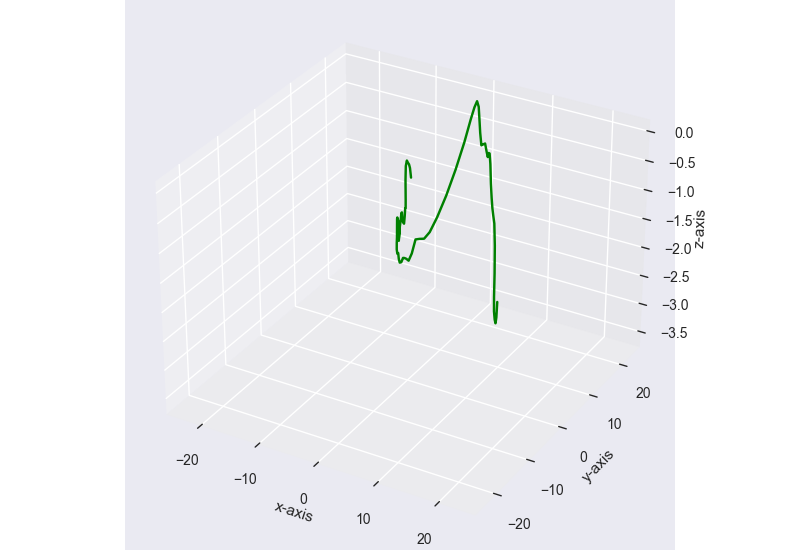

In [8]:
# Rotating the plane
rot_ang = np.arcsin(y0/np.sqrt(x0**2 + y0**2))
# print(np.sin(rot_ang)**2)

rot_ax = np.array([0., 0., 1.])
# print(np.cross(rot_ax, v_in))

xss = []
yss = []
zss = []

for i in range(len(xs)):
    
    v_in = np.array([xs[i], ys[i], zs[i]])
    # print(v_in)

    v_fin = v_in*np.cos(rot_ang) + np.cross(rot_ax, v_in)*np.sin(rot_ang) + rot_ax*(np.dot(rot_ax, v_in))*(1 - np.cos(rot_ang))
    
    print(v_fin)
    
    xss.append(v_fin[0])
    yss.append(v_fin[1])
    zss.append(v_fin[2])
    
# creating 3d plot using matplotlib 
# in python
  
# for creating a responsive plot
%matplotlib widget
  
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
  
# creating figure
fig = plt.figure()
ax = Axes3D(fig)

# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

# creating the plot
plot_geeks = ax.plot(xss, yss, zss, color='green')

plt.xlim([-25., 25.])
plt.ylim([-25., 25.])

# displaying the plot
plt.show()

# Inference 

In [23]:
from scipy import stats
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import seaborn as sns
import pandas as pd
from theano import shared
from sklearn import preprocessing

print('Running on PyMC3 v{}'.format(pm.__version__))
data = pd.read_csv('./renfe_small.csv')
# data.drop('Unnamed: 0', axis = 1, inplace=True)
data = data.sample(frac=0.01, random_state=99)
data.head(3)
data.isnull().sum()/len(data)

Running on PyMC3 v3.11.5


insert_date    0.000000
origin         0.000000
destination    0.000000
start_date     0.000000
end_date       0.000000
train_type     0.000000
price          0.096899
train_class    0.000000
fare           0.000000
dtype: float64

In [24]:
data['train_class'] = data['train_class'].fillna(data['train_class'].mode().iloc[0])
data['fare'] = data['fare'].fillna(data['fare'].mode().iloc[0])
data['price'] = data.groupby('fare').transform(lambda x: x.fillna(x.mean()))

/var/folders/93/sp1x4ytn2mj_zkqd4_1gfdqr0000gn/T/ipykernel_124/698425401.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  data['price'] = data.groupby('fare').transform(lambda x: x.fillna(x.mean()))
/var/folders/93/sp1x4ytn2mj_zkqd4_1gfdqr0000gn/T/ipykernel_124/698425401.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  data['price'] = data.groupby('fare').transform(lambda x: x.fillna(x.mean()))


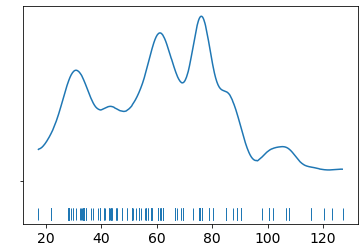

In [25]:
az.plot_kde(data['price'].values, rug=True)
plt.yticks([0], alpha=0);

In [26]:
with pm.Model() as model_g:
    μ = pm.Uniform('μ', lower=0, upper=300)
    σ = pm.HalfNormal('σ', sd=10)
    y = pm.Normal('y', mu=μ, sd=σ, observed=data['price'].values)
    trace_g = pm.sample(1000, tune=1000)

/Users/reza/anaconda3/envs/mosh/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/reza/anaconda3/envs/mosh/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


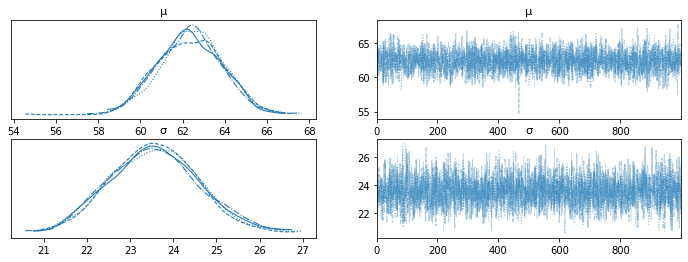

In [27]:
az.plot_trace(trace_g);

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/reza/anaconda3/envs/mosh/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


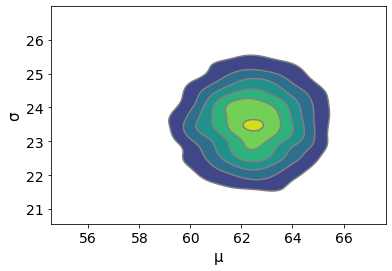

In [28]:
az.plot_pair(trace_g, kind='kde', fill_last=False);

In [29]:
az.summary(trace_g)

Got error No model on context stack. trying to find log_likelihood in translation.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
μ,62.372,1.499,59.644,65.085,0.025,0.018,3554.0,2930.0,1.0
σ,23.570,1.018,21.617,25.434,0.017,0.012,3523.0,2778.0,1.0


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/reza/anaconda3/envs/mosh/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'μ'}>,
       <AxesSubplot:title={'center':'σ'}>], dtype=object)

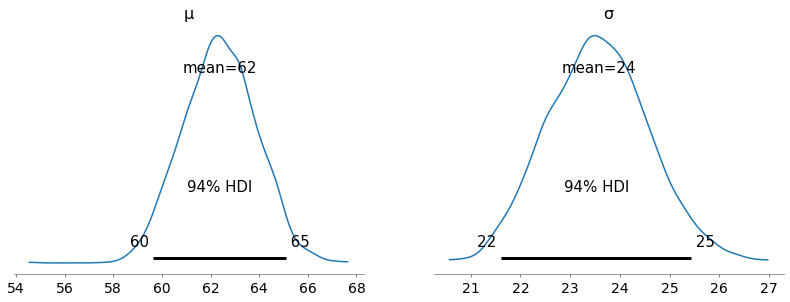

In [30]:
az.plot_posterior(trace_g)

In [31]:
pm.gelman_rubin(trace_g)

AttributeError: module 'pymc3' has no attribute 'gelman_rubin'

# Tests

In [6]:
# Rotation matrix test
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.mosh import rot as R

phi = 0.1
theta = 0.
psi = 0.
degree = False

print(R(phi, theta, psi, degree))

[[ 1.          0.          0.        ]
 [ 0.          0.99500417 -0.09983342]
 [ 0.          0.09983342  0.99500417]]


In [78]:
# Test to check the points are in the plane.

3.2*(0.685714285714286 + 3.57514652988308) + 1.2*(1.37142857142857 - 12.7337240796882)

1.5987211554602254e-14